# Enfoque alternativo en la modelación de distribución de viajes

## Encuesta de movilidad 2023

La Encuesta de Movilidad 2023 de Bogotá es un estudio integral que tiene como objetivo recopilar información detallada sobre los patrones de desplazamiento en la ciudad y en los municipios vecinos de su área de influencia. Este proceso comprende:

- **Encuesta Origen-Destino de Hogares (EODH):**  
  Se recolectan datos a nivel de hogar para conocer los orígenes y destinos de los viajes diarios de los residentes, permitiendo identificar patrones de movilidad en función de variables sociodemográficas y características del viaje.

- **Encuesta Origen-Destino de Interceptación (EODI):**  
  Se realizan encuestas en puntos estratégicos (como estaciones de transporte o intersecciones críticas) para captar información complementaria sobre los desplazamientos y validar datos obtenidos en la EODH.


# Identificación Iteración 1

In [40]:
# Cargando las librerías necesarias
# library(sf)
library(sf)
library('dplyr')
library(ggplot2)

# Declarar las rutas de los datos
trips_path <- "./Encuesta de Movilidad 2023/EODH/CSV/Modulo_viajes.csv"
# Cargar el CSV de viajes en un data frame usando read.csv()
trips_df <- read.csv(trips_path, sep = ";", fileEncoding = "Windows-1252", stringsAsFactors = FALSE)

In [41]:
colnames(trips_df)

[1] "cod_hg"                     "nom_mun_hg"                
 [3] "cod_upl_hg"                 "cod_utam_hg"               
 [5] "zat_hg"                     "estra_hg"                  
 [7] "cod_pers"                   "cod_vj"                    
 [9] "orden_vj"                   "otro_vj"                   
[11] "zat_ori"                    "utam_ori"                  
[13] "upl_ori"                    "localidad_ori"             
[15] "nom_mun_ori"                "zat_des"                   
[17] "utam_des"                   "upl_des"                   
[19] "localidad_des"              "nom_mun_des"               
[21] "hora_ini"                   "hora_fin"                  
[23] "duracion_min"               "t_acceso_min"              
[25] "t_espera_min"               "t_egreso_min"              
[27] "modo_principal_agrupado"    "modo_principal_desagrupado"
[29] "motivo_viaje"               "motivo_viaje_cuidado"      
[31] "frecuencia_viaje"           "etapas"                    
[33] "app_antes_vj"               "app_durante_vj"            
[35] "edad"                       "sexo"                      
[37] "genero"                     "orien_sexual"              
[39] "identidad_etnica"           "madre_cab_familia"         
[41] "max_nivel_edu"              "ocupacion_principal"       
[43] "key_hg"                     "key_pers"                  
[45] "key_pers_viaja"             "key_viaje"                 
[47] "fexp_vj"

In [42]:
summary(trips_df)

     cod_hg       nom_mun_hg          cod_upl_hg    cod_utam_hg       
 Min.   :    1   Length:100174      Min.   :  1.0   Length:100174     
 1st Qu.: 5728   Class :character   1st Qu.: 12.0   Class :character  
 Median :11378   Mode  :character   Median : 22.0   Mode  :character  
 Mean   :11421                      Mean   :136.1                     
 3rd Qu.:17131                      3rd Qu.: 33.0                     
 Max.   :22755                      Max.   :899.0                     
     zat_hg         estra_hg            cod_pers         cod_vj      
 Min.   :   7.0   Length:100174      Min.   :    1   Min.   :     1  
 1st Qu.: 328.0   Class :character   1st Qu.:17462   1st Qu.: 25044  
 Median : 626.0   Mode  :character   Median :34092   Median : 50088  
 Mean   : 670.2                      Mean   :34238   Mean   : 50088  
 3rd Qu.: 912.0                      3rd Qu.:51266   3rd Qu.: 75131  
 Max.   :1950.0                      Max.   :67555   Max.   :100174  
    orden_vj 

In [43]:
head(trips_df)

cod_hg nom_mun_hg cod_upl_hg cod_utam_hg zat_hg estra_hg cod_pers cod_vj
1 1      Bogotá     31         UTAM043     374    3        13967    1     
2 1      Bogotá     31         UTAM043     374    3        13967    2     
3 1      Bogotá     31         UTAM043     374    3        13968    3     
4 1      Bogotá     31         UTAM043     374    3        13968    4     
5 1      Bogotá     31         UTAM043     374    3        13968    5     
6 1      Bogotá     31         UTAM043     374    3        13968    6     
  orden_vj otro_vj ⋯ orien_sexual identidad_etnica madre_cab_familia
1 1        Sí      ⋯ Heterosexual Ninguno          No aplica        
2 2        No      ⋯ Heterosexual Ninguno          No aplica        
3 1        Sí      ⋯ Heterosexual Ninguno          Sí               
4 2        Sí      ⋯ Heterosexual Ninguno          Sí               
5 3        Sí      ⋯ Heterosexual Ninguno          Sí               
6 4        No      ⋯ Heterosexual Ninguno          Sí               
  max_nivel_edu                ocupacion_principal            
1 Secundaria completa           Empleado público              
2 Secundaria completa           Empleado público              
3 Técnico/Tecnológico completa  Empleado de empresa particular
4 Técnico/Tecnológico completa  Empleado de empresa particular
5 Técnico/Tecnológico completa  Empleado de empresa particular
6 Técnico/Tecnológico completa  Empleado de empresa particular
  key_hg                                   
1 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b
2 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b
3 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b
4 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b
5 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b
6 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b
  key_pers                                                        
1 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/accepted/B/person_b[1]
2 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/accepted/B/person_b[1]
3 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/accepted/B/person_b[2]
4 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/accepted/B/person_b[2]
5 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/accepted/B/person_b[2]
6 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/accepted/B/person_b[2]
  key_pers_viaja                                                  
1 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/accepted/person_d_e[1]
2 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/accepted/person_d_e[1]
3 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/accepted/person_d_e[2]
4 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/accepted/person_d_e[2]
5 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/accepted/person_d_e[2]
6 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/accepted/person_d_e[2]
  key_viaje                                                                    
1 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/accepted/person_d_e[1]/D/journey[1]
2 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/accepted/person_d_e[1]/D/journey[2]
3 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/accepted/person_d_e[2]/D/journey[1]
4 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/accepted/person_d_e[2]/D/journey[2]
5 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/accepted/person_d_e[2]/D/journey[3]
6 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/accepted/person_d_e[2]/D/journey[4]
  fexp_vj
1  274,9 
2  274,9 
3  274,9 
4  274,9 
5  274,9 
6  274,9

In [47]:
trips_df$trips <- 1

In [48]:
head(trips_df)

cod_hg nom_mun_hg cod_upl_hg cod_utam_hg zat_hg estra_hg cod_pers cod_vj
1 1      Bogotá     31         UTAM043     374    3        13967    1     
2 1      Bogotá     31         UTAM043     374    3        13967    2     
3 1      Bogotá     31         UTAM043     374    3        13968    3     
4 1      Bogotá     31         UTAM043     374    3        13968    4     
5 1      Bogotá     31         UTAM043     374    3        13968    5     
6 1      Bogotá     31         UTAM043     374    3        13968    6     
  orden_vj otro_vj ⋯ identidad_etnica madre_cab_familia
1 1        Sí      ⋯ Ninguno          No aplica        
2 2        No      ⋯ Ninguno          No aplica        
3 1        Sí      ⋯ Ninguno          Sí               
4 2        Sí      ⋯ Ninguno          Sí               
5 3        Sí      ⋯ Ninguno          Sí               
6 4        No      ⋯ Ninguno          Sí               
  max_nivel_edu                ocupacion_principal            
1 Secundaria completa           Empleado público              
2 Secundaria completa           Empleado público              
3 Técnico/Tecnológico completa  Empleado de empresa particular
4 Técnico/Tecnológico completa  Empleado de empresa particular
5 Técnico/Tecnológico completa  Empleado de empresa particular
6 Técnico/Tecnológico completa  Empleado de empresa particular
  key_hg                                   
1 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b
2 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b
3 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b
4 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b
5 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b
6 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b
  key_pers                                                        
1 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/accepted/B/person_b[1]
2 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/accepted/B/person_b[1]
3 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/accepted/B/person_b[2]
4 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/accepted/B/person_b[2]
5 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/accepted/B/person_b[2]
6 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/accepted/B/person_b[2]
  key_pers_viaja                                                  
1 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/accepted/person_d_e[1]
2 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/accepted/person_d_e[1]
3 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/accepted/person_d_e[2]
4 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/accepted/person_d_e[2]
5 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/accepted/person_d_e[2]
6 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/accepted/person_d_e[2]
  key_viaje                                                                    
1 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/accepted/person_d_e[1]/D/journey[1]
2 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/accepted/person_d_e[1]/D/journey[2]
3 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/accepted/person_d_e[2]/D/journey[1]
4 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/accepted/person_d_e[2]/D/journey[2]
5 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/accepted/person_d_e[2]/D/journey[3]
6 uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/accepted/person_d_e[2]/D/journey[4]
  fexp_vj trips
1  274,9  1    
2  274,9  1    
3  274,9  1    
4  274,9  1    
5  274,9  1    
6  274,9  1

In [11]:
sum(duplicated(trips_df))

[1] 0

In [49]:
summary(flow_df$total_trips)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    1.00    1.00    2.11    2.00  710.00 

In [51]:
which(is.na(trips_df$fexp_vj))

integer(0)

In [55]:
# Convertir la columna fexp_vj de texto a numérica
trips_df$fexp_vj <- gsub("\\.", "", trips_df$fexp_vj)  
trips_df$fexp_vj <- gsub(",", ".", trips_df$fexp_vj1)
trips_df$fexp_vj <- as.numeric(trips_df$fexp_vj1)

In [57]:
# Convertir la columna duracion_min de texto a numérica
trips_df$duracion_min <- gsub("\\.", "", trips_df$duracion_min)  
trips_df$duracion_min <- gsub(",", ".", trips_df$duracion_min)
trips_df$duracion_min <- as.numeric(trips_df$duracion_min)

In [58]:
length(unique((trips_df$fexp_vj1)))

[1] 4782

In [61]:
# Agrupar el dataset para usar en adelante como los datos para este proyecto

flow_df <- trips_df %>%
  group_by(across(all_of(c('max_nivel_edu', 'app_antes_vj', 'otro_vj', 'orden_vj', 'estra_hg', 'etapas', 'zat_hg', 'utam_ori', 'utam_des')))) %>%
  summarise(
    total_trips   = sum(trips, na.rm = TRUE),
    weights   = sum(fexp_vj, na.rm = TRUE),
    mean_duracion   = mean(duracion_min) / length(duracion_min) ,
    mean_edad_prom   = mean(edad),
    mean_mujeres = mean(sexo == "Mujer"),
    mean_modo_a_pie = mean(modo_principal_agrupado == "A PIE > 15 MIN" | modo_principal_agrupado == "A PIE < 15 MIN"),
    mean_modo_priv = mean(modo_principal_agrupado == "AUTO" | modo_principal_agrupado == "MOTO") ,
    mean_modo_bici = mean(modo_principal_agrupado == "BICICLETA"),
    mean_modo_pub = mean(modo_principal_agrupado == "TRANSPORTE PÚBLICO"),
    mean_modo_tax = mean(modo_principal_agrupado == "TAXI OCUPADO"), 
    mean_modo_otro = mean(modo_principal_agrupado == "ESPECIAL OCUPADO" | modo_principal_agrupado == "INFORMAL" | modo_principal_agrupado == "OTRO"),
    mean_otro_viaje = mean(otro_vj == "No") ,
    mean_freq_todos_dias = mean(frecuencia_viaje == "Prácticamente todos los días") ,
    mean_freq_varios_dias = mean(frecuencia_viaje == "Varias veces a la semana") ,
    mean_freq_otro = mean(frecuencia_viaje != "Prácticamente todos los días" & frecuencia_viaje != "Varias veces a la semana") ,
    mean_madre_cab_familia = mean(madre_cab_familia != "No") ,
      
      
    .groups = "drop"
  )

print(nrow(trips_df))
print(nrow(flow_df))



[1] 100174
[1] 66823


Warning message:
“Removed 78 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_bar()`).”


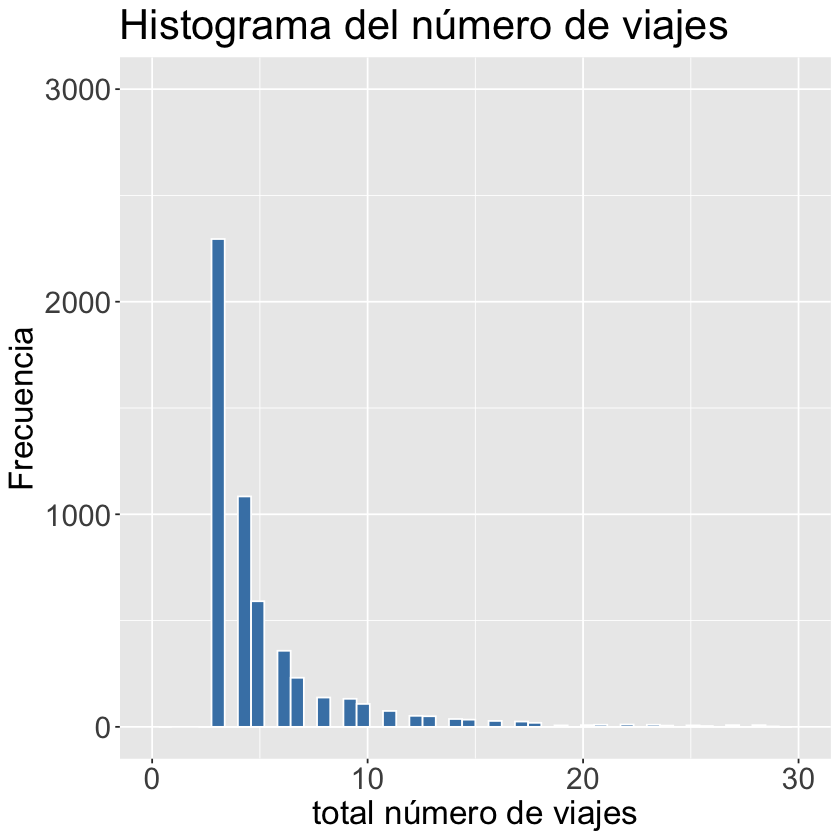

In [62]:
ggplot(flow_df, aes(x = total_trips)) +
  geom_histogram(bins = 50, fill = "steelblue", color = "white") +
  scale_x_continuous(limits = c(0, 30)) +  # Limita el rango del eje x entre 0 y 100
  scale_y_continuous(limits = c(0, 3000)) + # Limita el rango del eje y entre 0 y 5000
  labs(
    title = "Histograma del número de viajes",
    x = "total número de viajes", 
    y = "Frecuencia"
  ) +
  theme(
    plot.title = element_text(size = 25),        # Tamaño del título del gráfico
    axis.title.x = element_text(size = 20),      # Tamaño de la etiqueta del eje X
    axis.title.y = element_text(size = 20),      # Tamaño de la etiqueta del eje Y
    axis.text.x = element_text(size = 18),       # Tamaño de los valores del eje X
    axis.text.y = element_text(size = 18)        # Tamaño de los valores del eje Y
  )

Observaciones Generales
	•	La mayoría de distribuciones están fuertemente sesgadas a la derecha: Muchísimos valores en 0 y pocos outliers grandes (hasta 100).
	•	No se ve un patrón lineal claro en muchos casos; es común en datos de viajes que haya muchos ceros y pocos casos de viajes muy altos (colas pesadas).
	•	Para variables categóricas con boxplot, la “caja” suele estar comprimida en 0, indicando que la mediana y los cuartiles están en valores bajos, mientras los puntos más altos son outliers.
	•	Para variables numéricas (especialmente IDs de zona), la interpretación es compleja porque no hay un sentido ordinal “natural” (un ID mayor no implica más distancia ni más población, solo un código diferente). Aun así, se ve la distribución de total_trips según cada zona.

### Columnas_modelo

In [38]:
print(ncol(flow_df))
colnames(flow_df)

[1] 25


[1] "max_nivel_edu"          "app_antes_vj"           "otro_vj"               
 [4] "orden_vj"               "estra_hg"               "etapas"                
 [7] "zat_hg"                 "utam_ori"               "utam_des"              
[10] "total_trips"            "weights"                "mean_duracion"         
[13] "mean_edad_prom"         "mean_mujeres"           "mean_modo_a_pie"       
[16] "mean_modo_priv"         "mean_modo_bici"         "mean_modo_pub"         
[19] "mean_modo_tax"          "mean_modo_otro"         "mean_otro_viaje"       
[22] "mean_freq_todos_dias"   "mean_freq_varios_dias"  "mean_freq_otro"        
[25] "mean_madre_cab_familia"

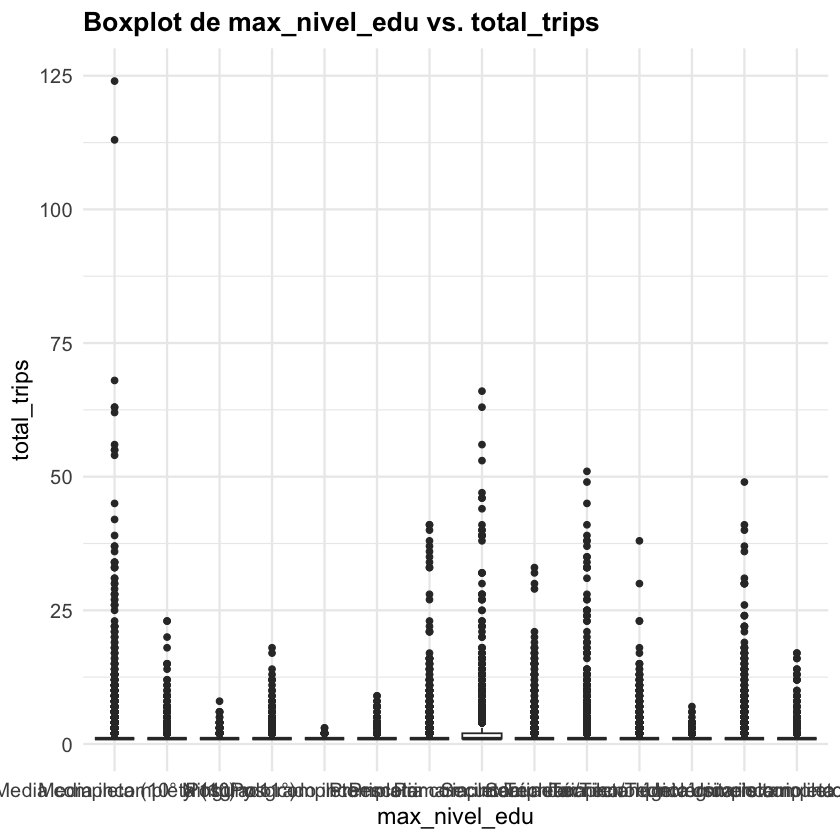

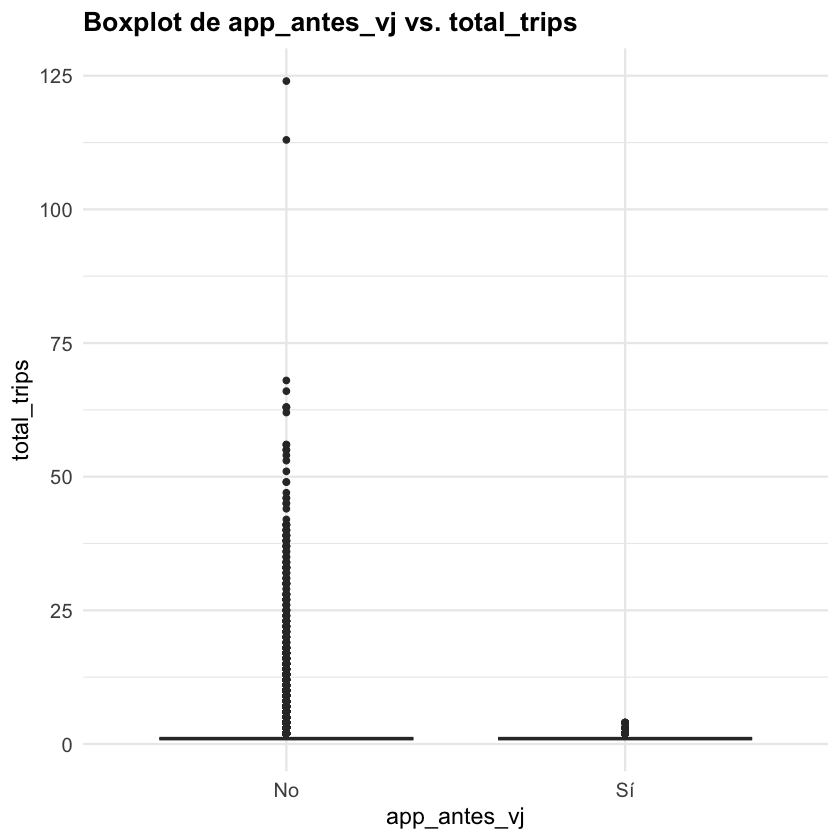

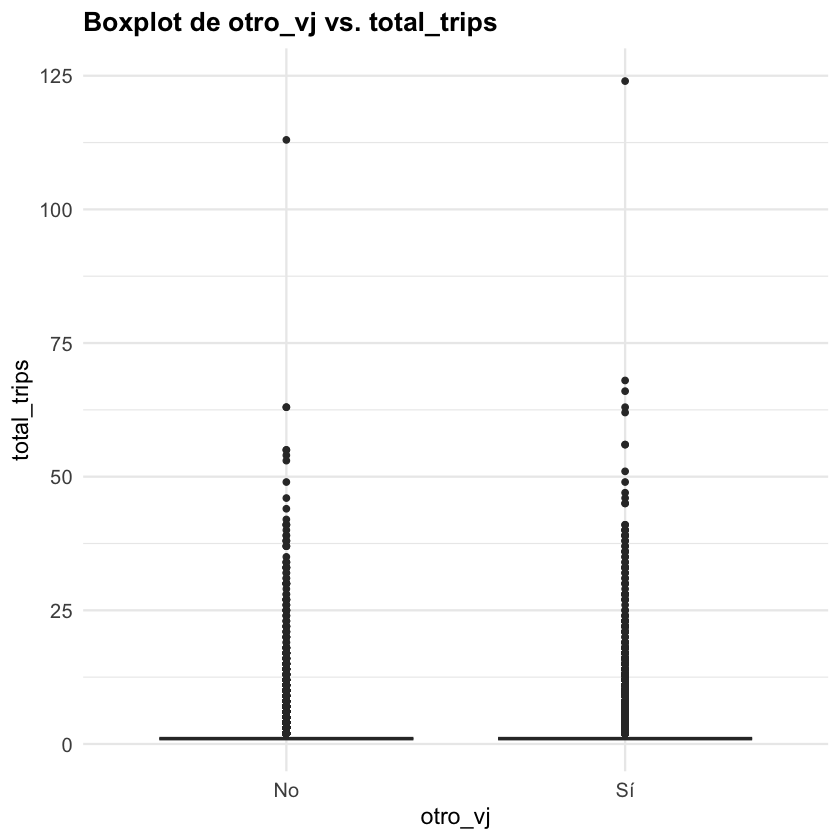

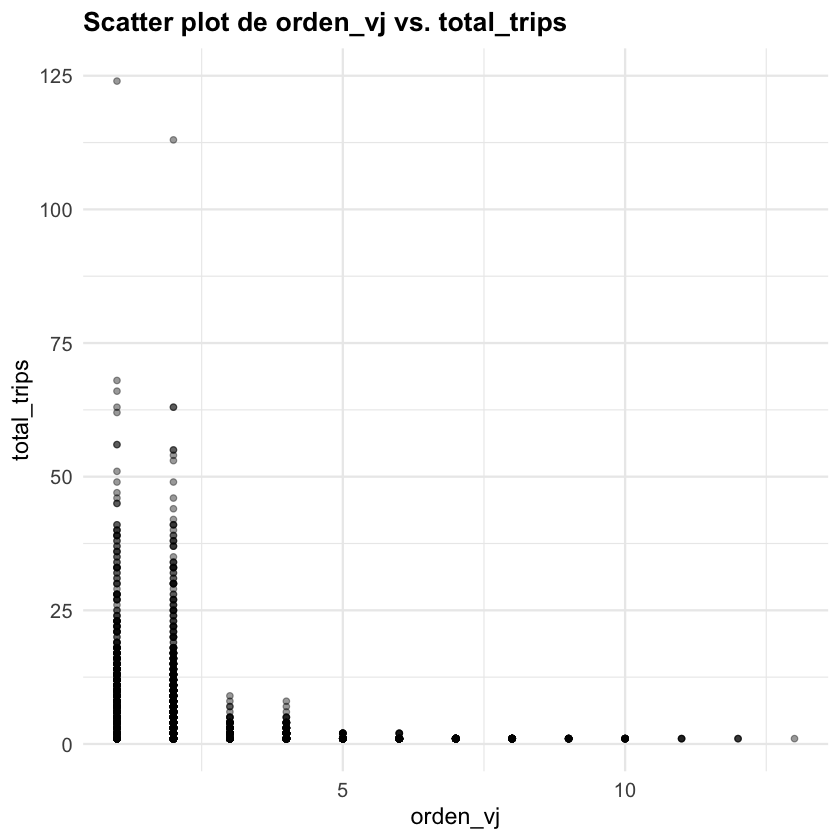

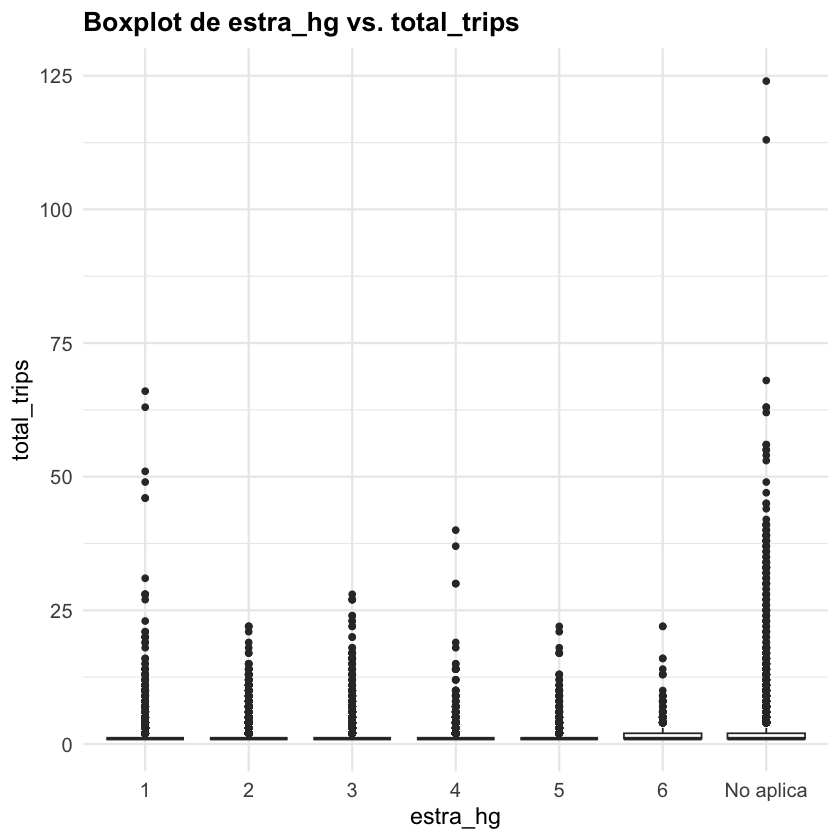

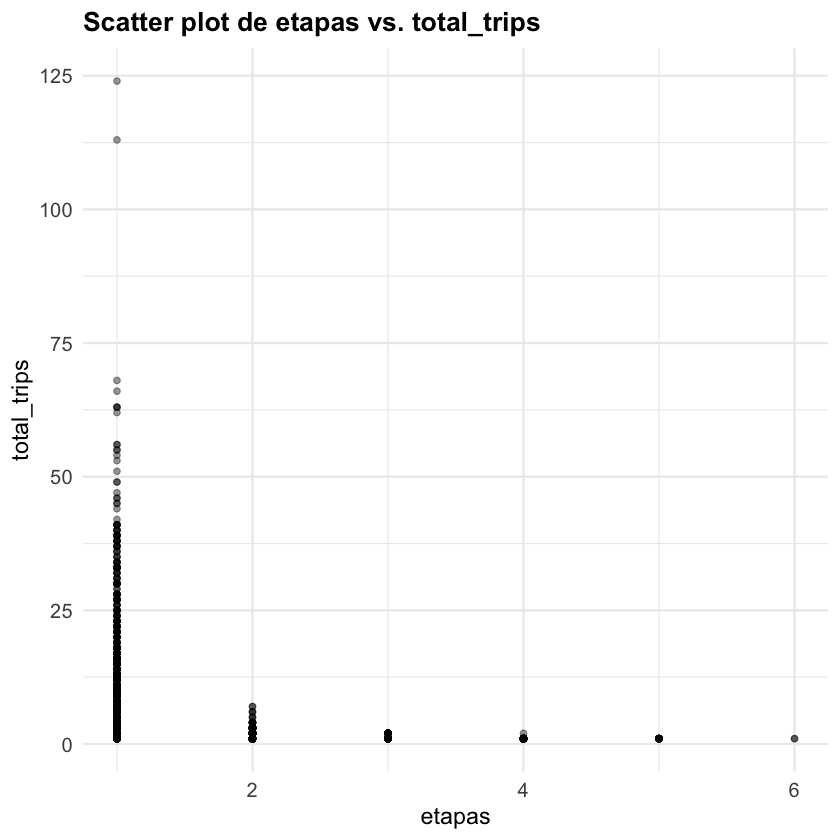

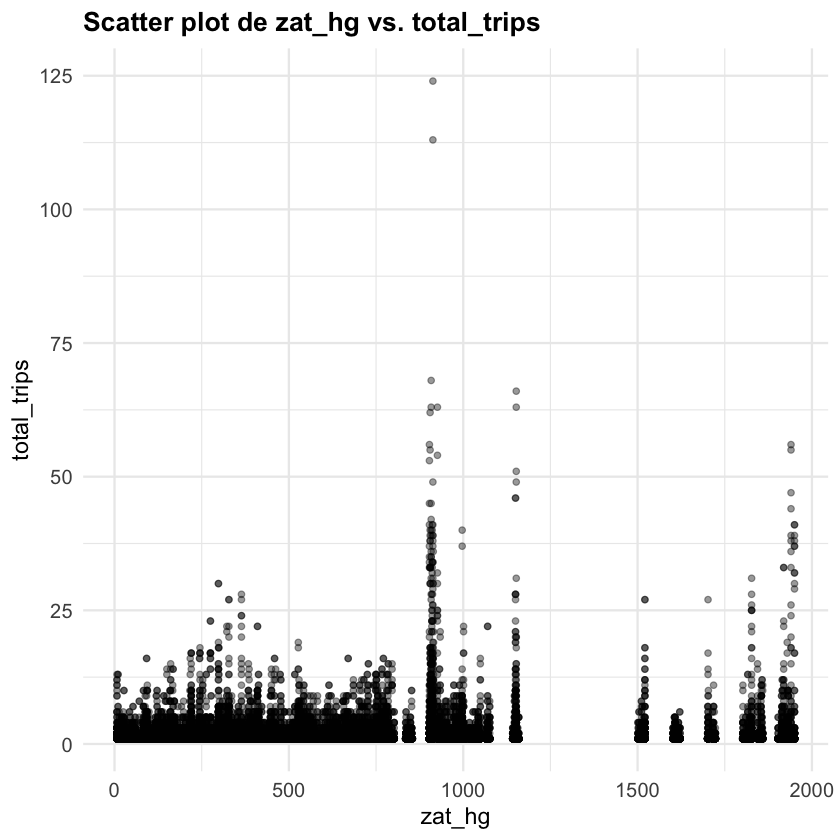

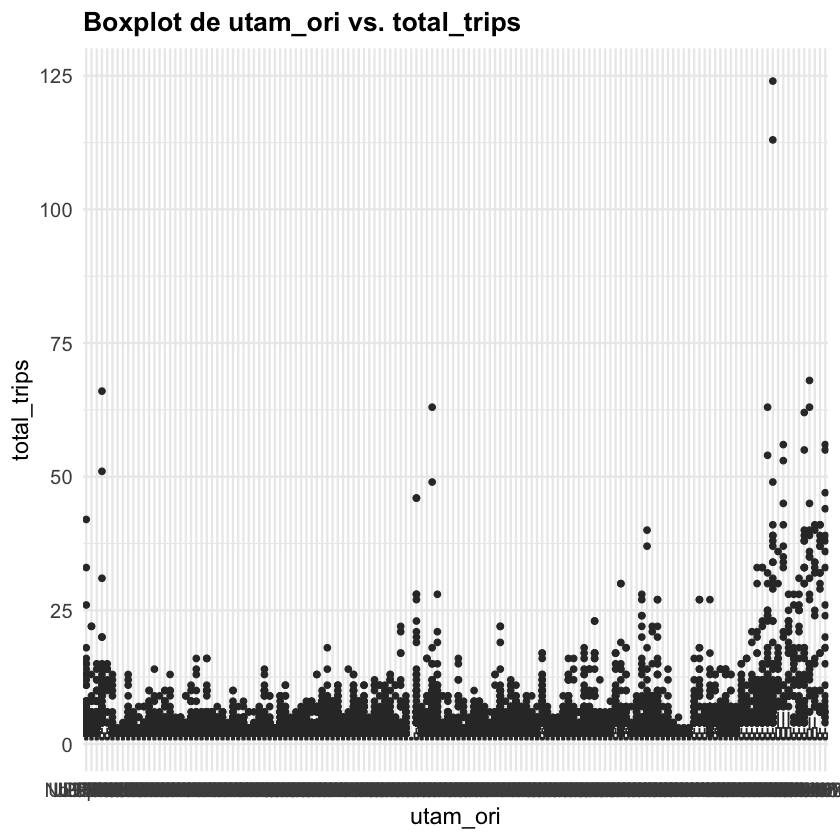

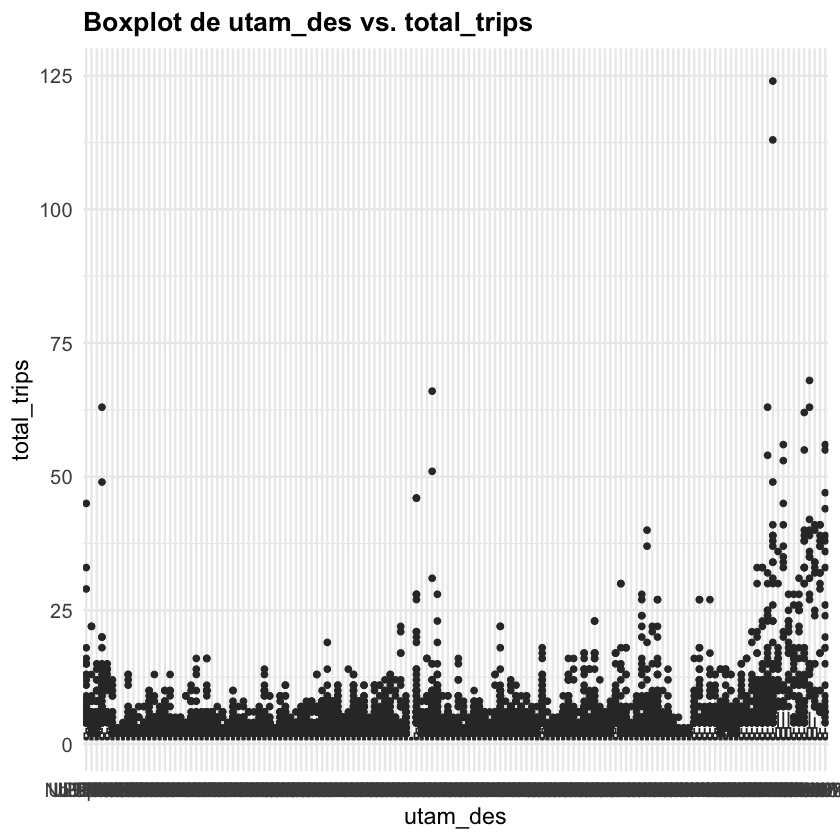

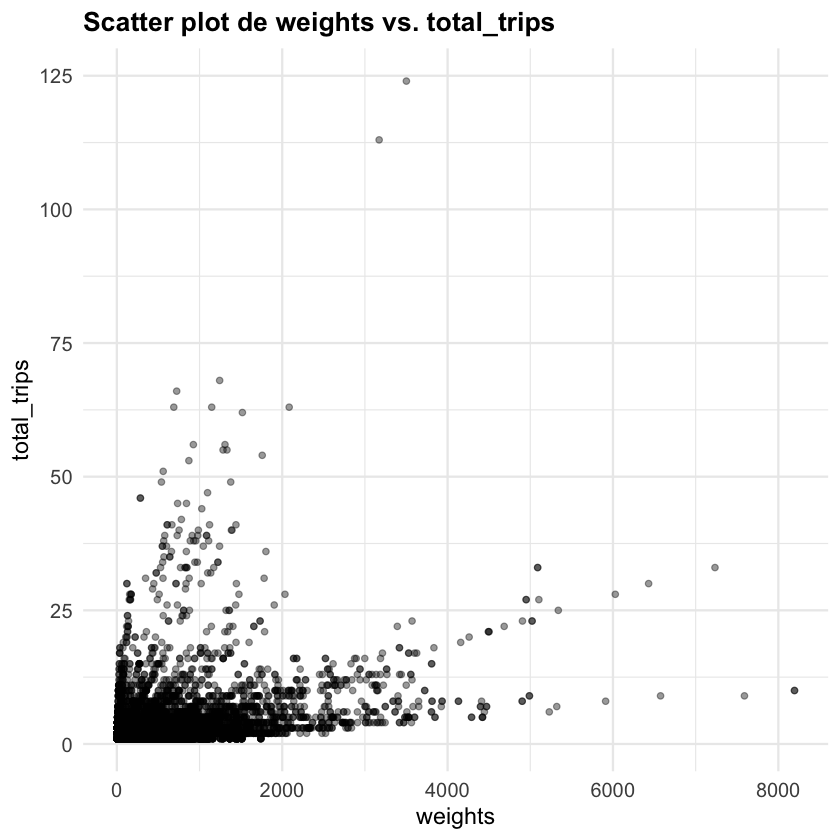

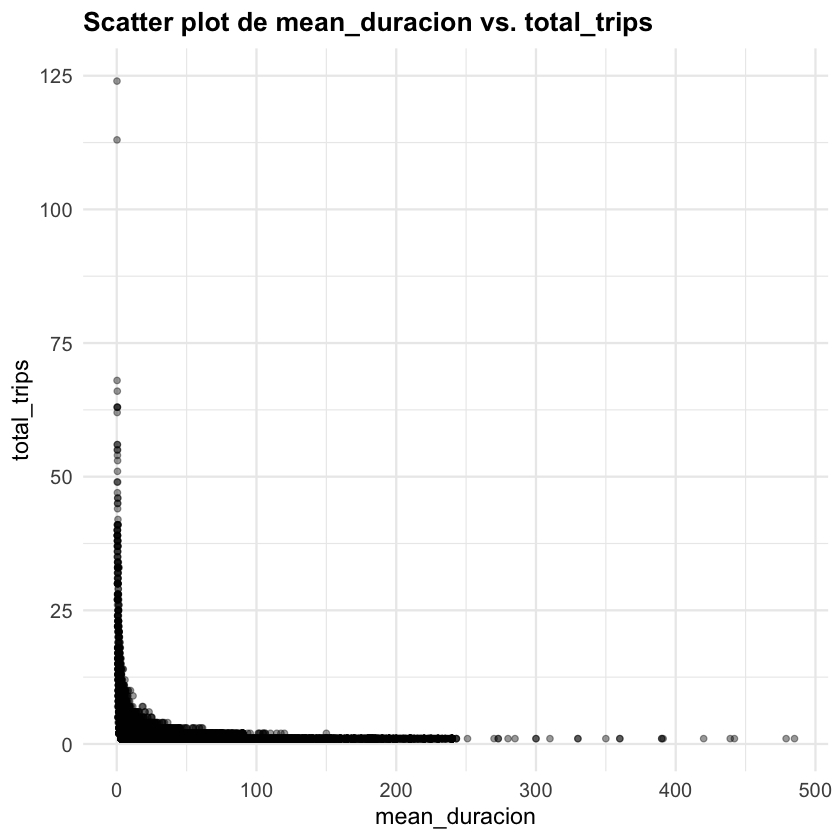

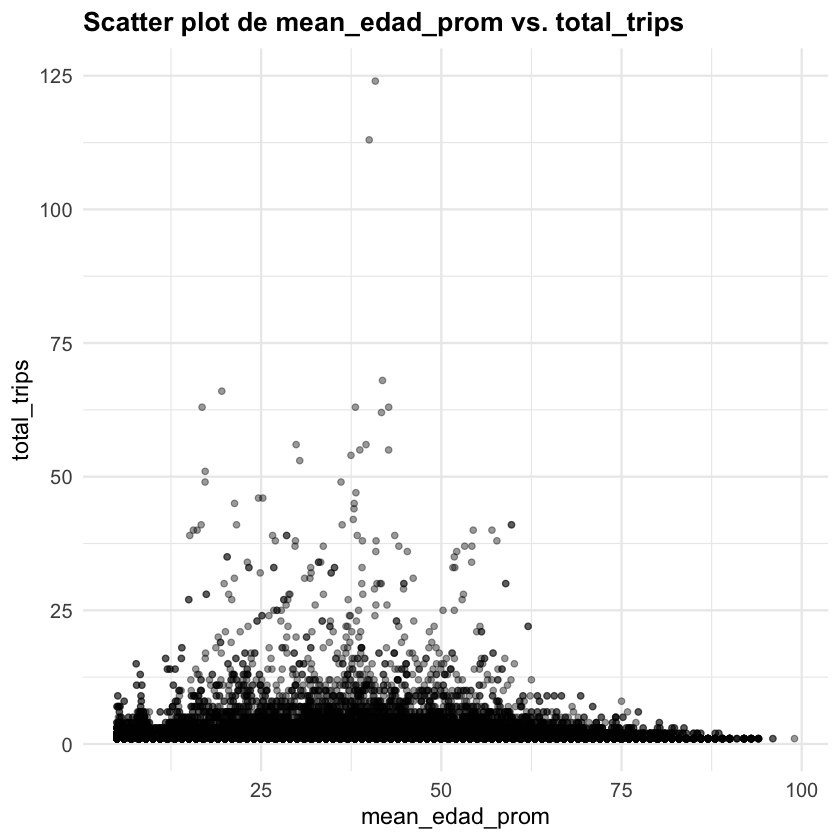

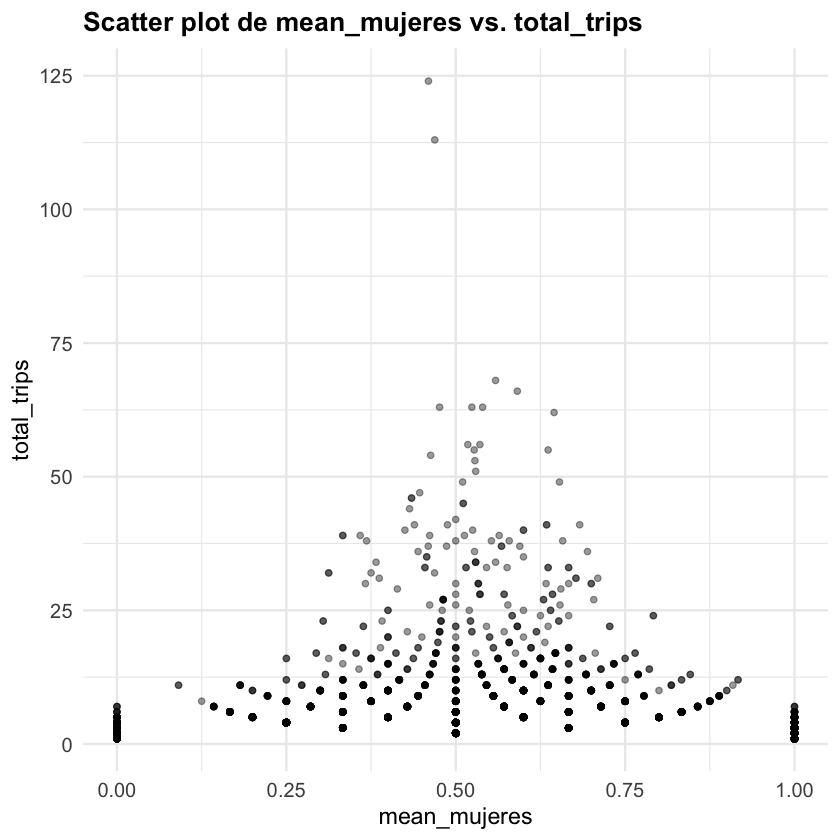

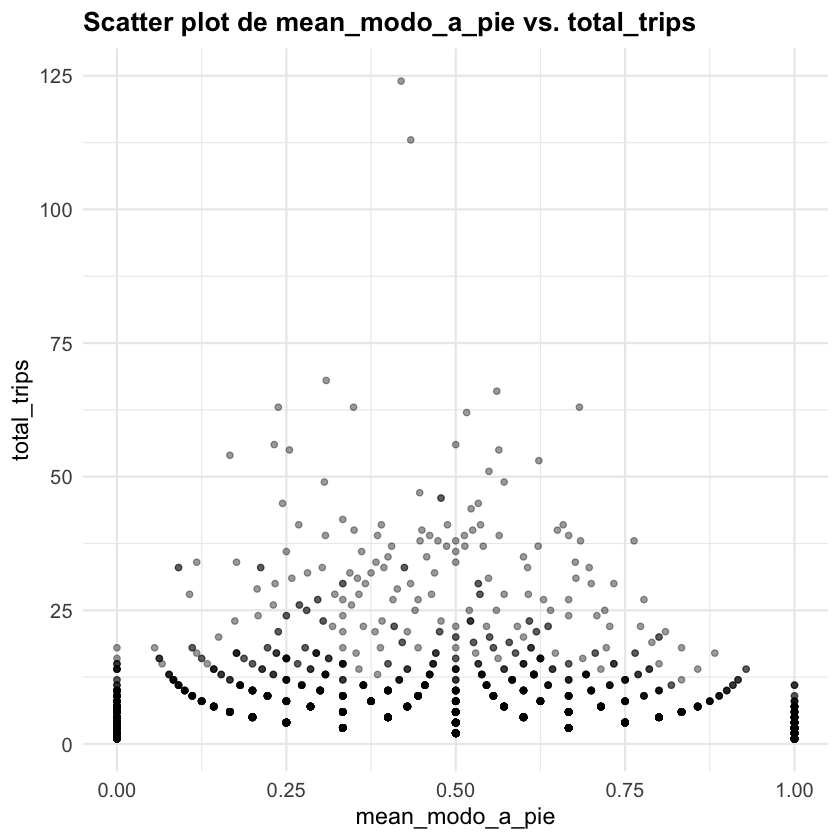

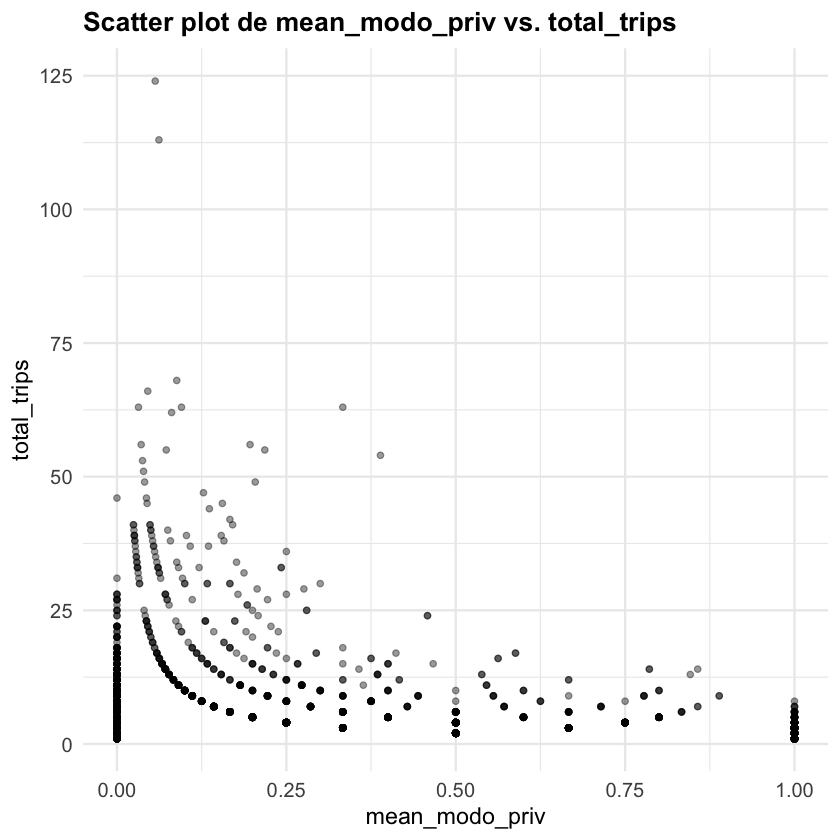

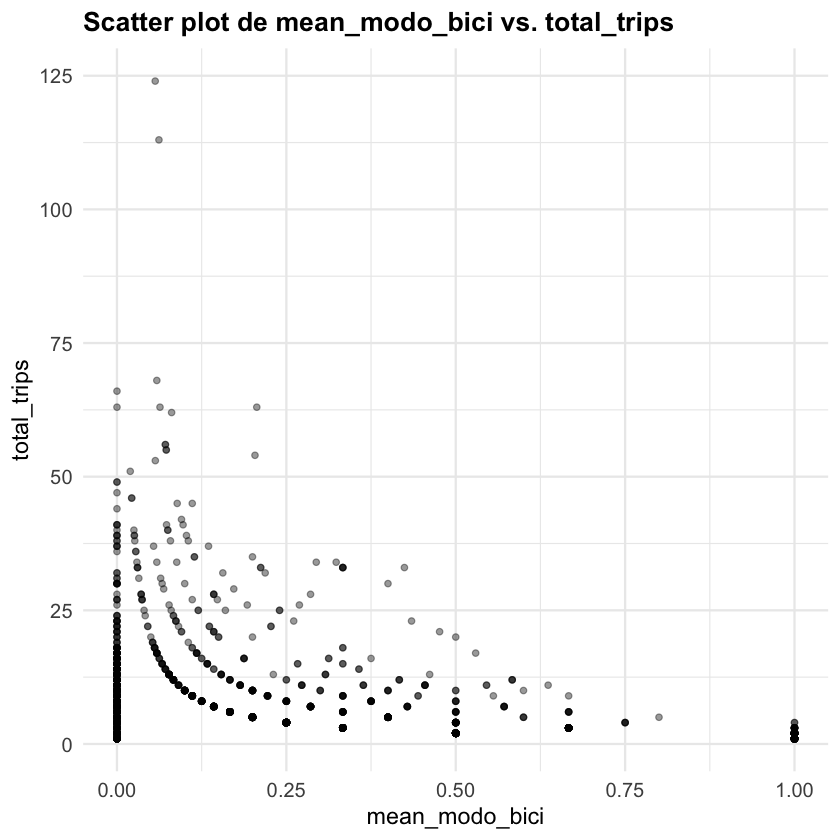

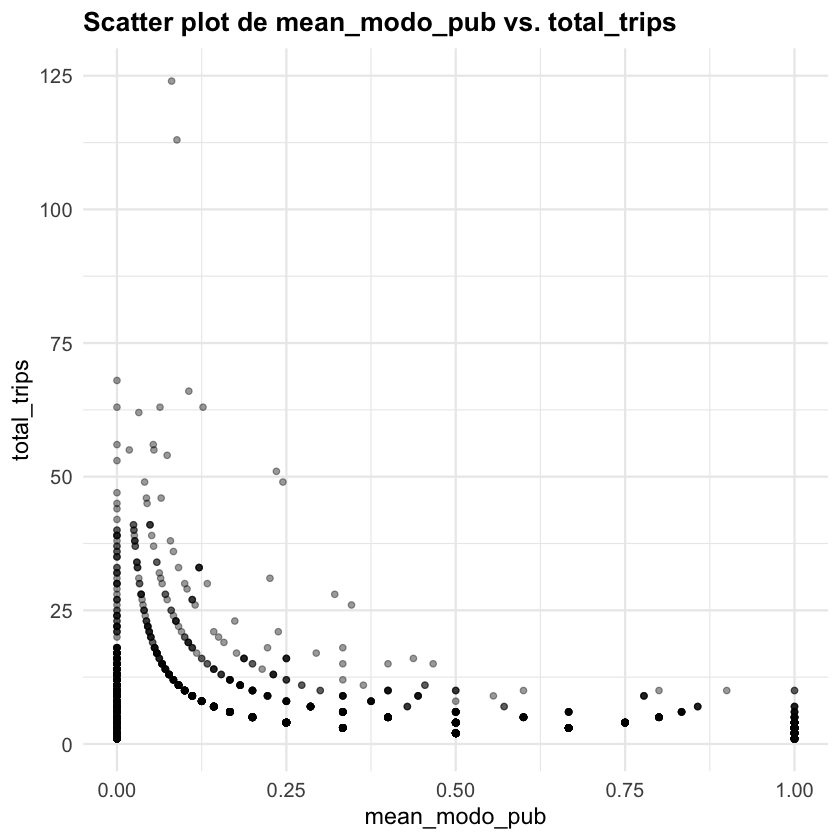

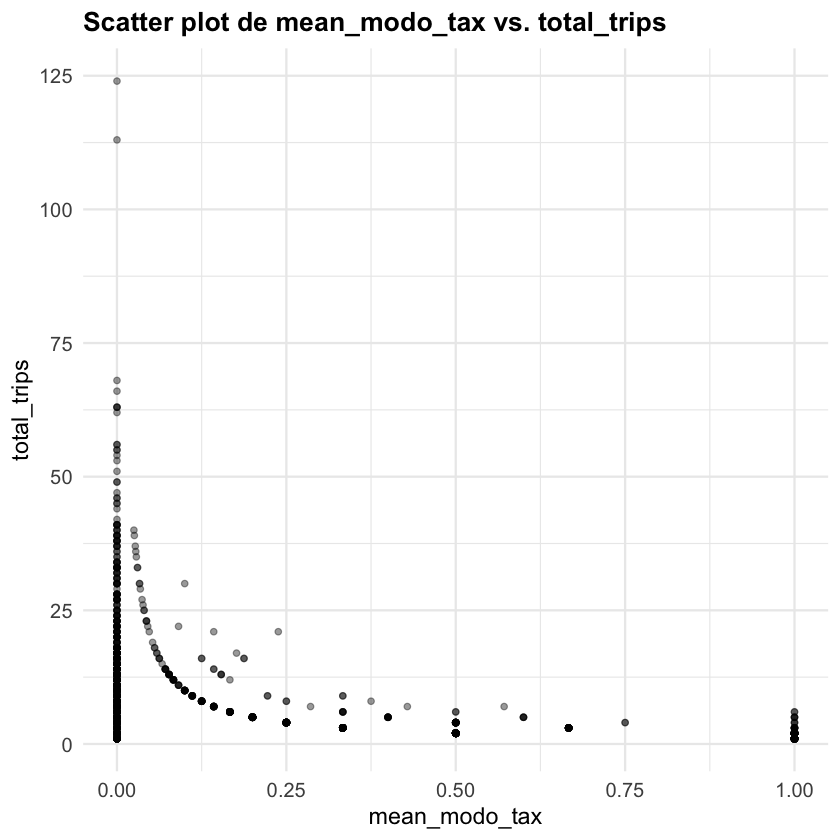

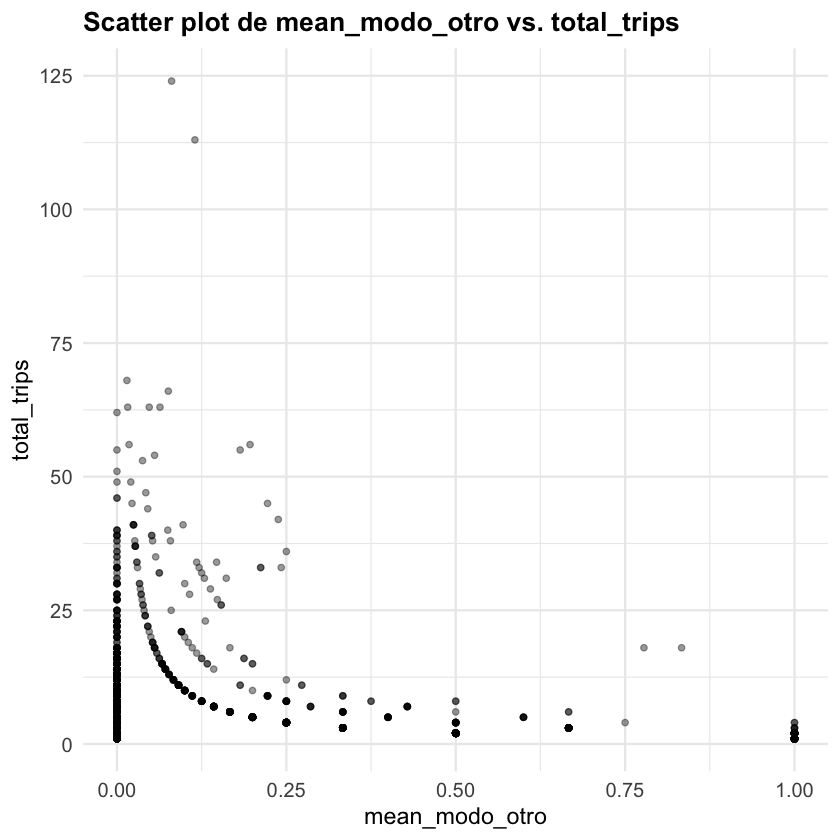

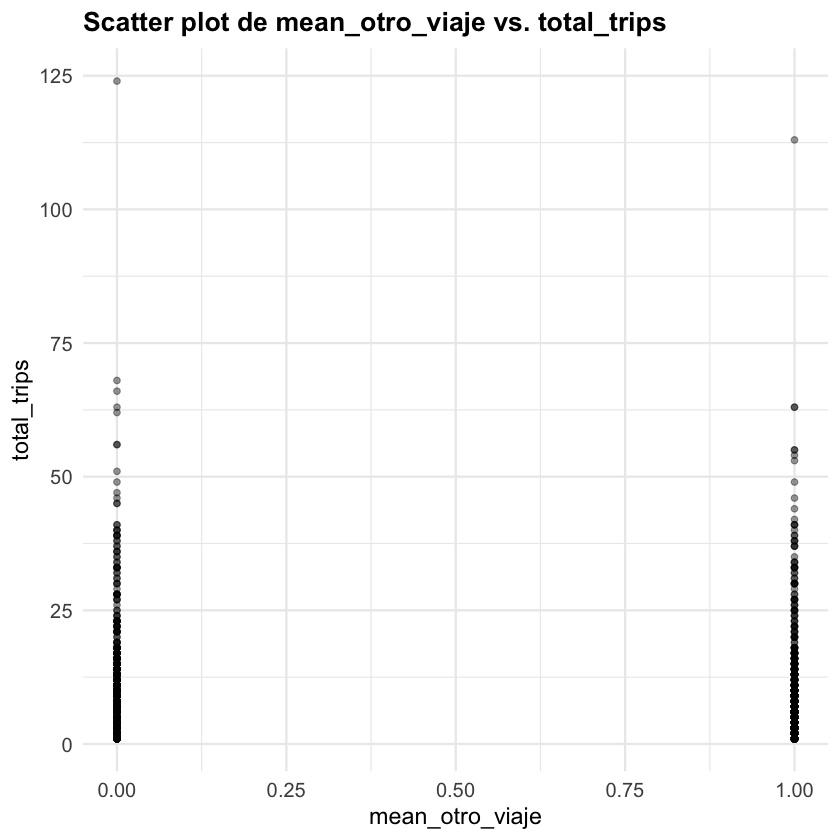

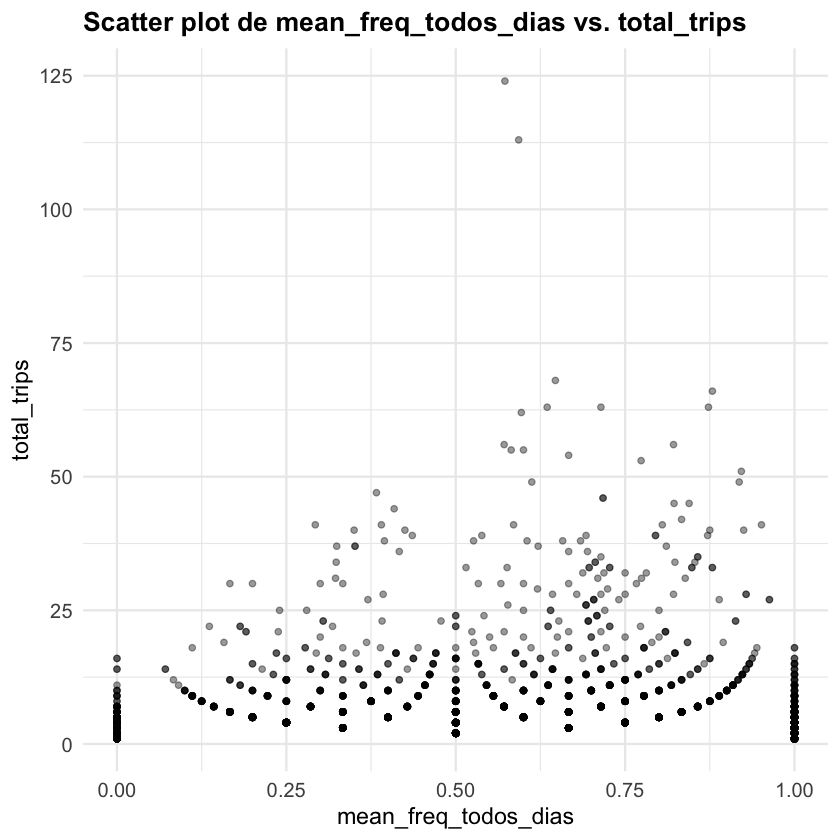

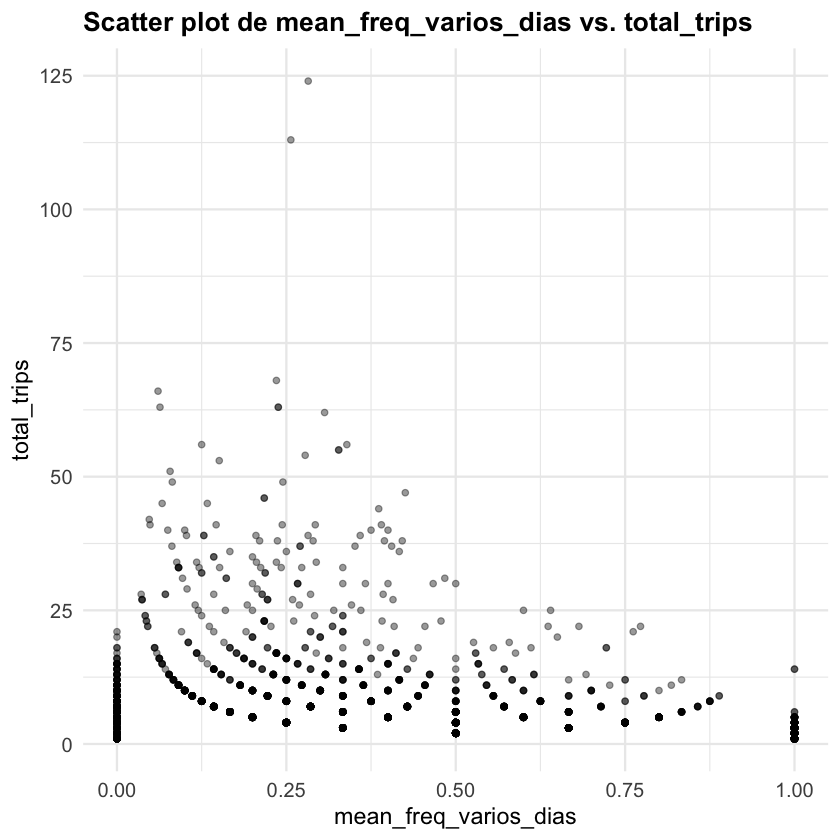

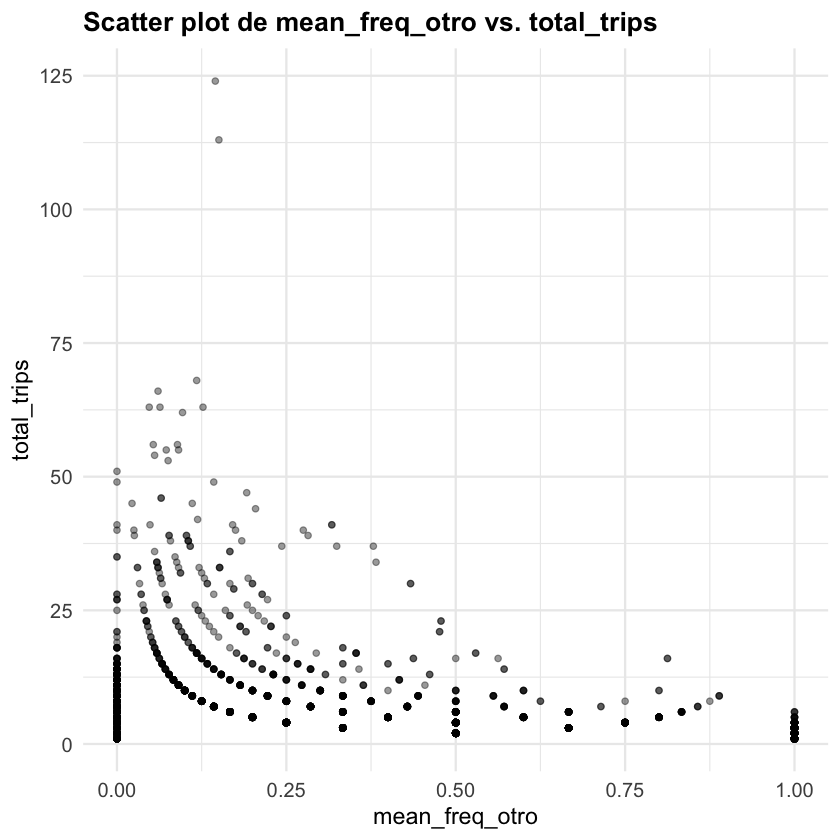

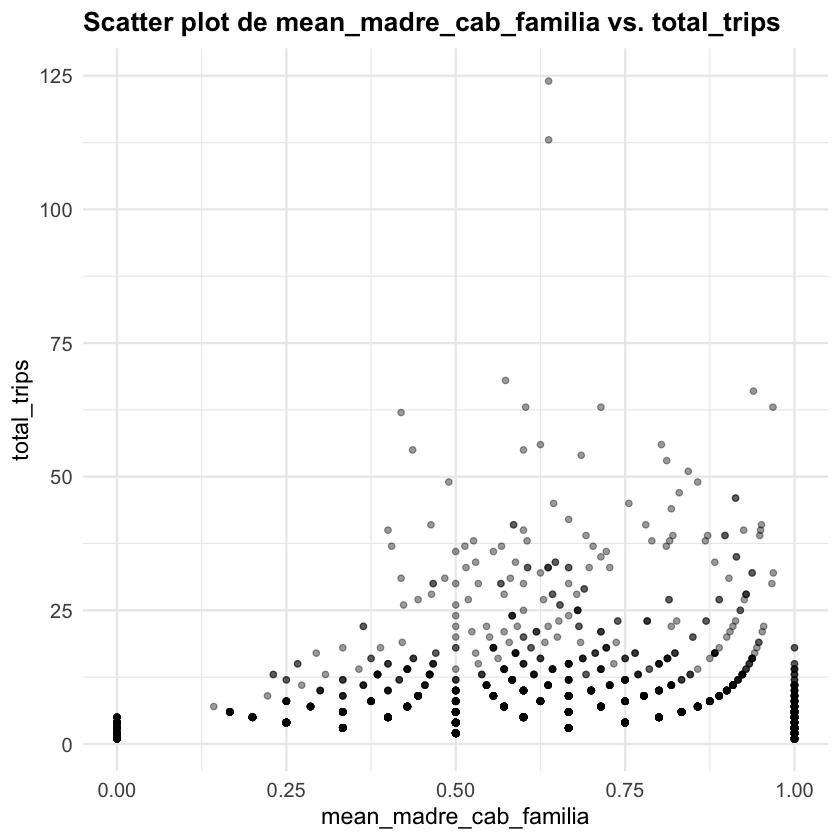

In [64]:
library(ggplot2)

# Lista de variables independientes (predictoras) en el modelo
vars <- c(
  "max_nivel_edu", "app_antes_vj", "otro_vj", "orden_vj", "estra_hg",
  "etapas", "zat_hg", "utam_ori", "utam_des", "weights",
  "mean_duracion", "mean_edad_prom", "mean_mujeres", "mean_modo_a_pie",
  "mean_modo_priv", "mean_modo_bici", "mean_modo_pub", "mean_modo_tax",
  "mean_modo_otro", "mean_otro_viaje", "mean_freq_todos_dias",
  "mean_freq_varios_dias", "mean_freq_otro", "mean_madre_cab_familia"
)

for (v in vars) {
  # Verifica si la variable es numérica
  if (is.numeric(flow_df[[v]])) {
    # Diagrama de dispersión
    p <- ggplot(flow_df, aes_string(x = v, y = "total_trips")) +
      geom_point(alpha = 0.4) +
      labs(
        title = paste("Scatter plot de", v, "vs. total_trips"),
        x = v,
        y = "total_trips"
      ) +
      theme_minimal(base_size = 14) +
      theme(
        plot.title = element_text(size = 16, face = "bold"),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        axis.text.x  = element_text(size = 12),
        axis.text.y  = element_text(size = 12)
      )
  } else {
    # Boxplot para variables categóricas
    p <- ggplot(flow_df, aes_string(x = v, y = "total_trips")) +
      geom_boxplot() +
      labs(
        title = paste("Boxplot de", v, "vs. total_trips"),
        x = v,
        y = "total_trips"
      ) +
      theme_minimal(base_size = 14) +
      theme(
        plot.title = element_text(size = 16, face = "bold"),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        axis.text.x  = element_text(size = 12),
        axis.text.y  = element_text(size = 12)
      )
  }
  
  print(p)  # Muestra cada gráfico
}

In [65]:
library(GGally)
num_vars <- c("total_trips", "etapas", "weights", 
              "mean_duracion", "mean_edad_prom", "mean_mujeres",
              "mean_modo_a_pie", "mean_modo_priv", "mean_modo_bici", 
              "mean_modo_pub", "mean_modo_tax", "mean_modo_otro")
flow_df_numeric <- flow_df[num_vars]

p <- ggpairs(flow_df_numeric)
psp <- ggpairs(flow_df_numeric,
        upper = list(continuous = wrap("cor", method = "spearman")))

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [45]:
ggsave("scatterplot_matrix.png", plot = p, width = 12, height = 8, dpi = 250)

In [ ]:
ggsave("scatterplot_matrixPSP.png", plot = psp, width = 12, height = 8, dpi = 250)

### Matriz de diagrama de dispersion y correlaciones (Pearson)

![Diagrama de dispersión](./scatterplot_matrix.png "Matrix Scatter Plot")

### Matriz de diagrama de dispersion y correlaciones (Spearman)

![Diagrama de dispersión](./scatterplot_matrixPSP.png "Matrix Scatter Plot")

Se observa que la forma de la variable total_trips se ve fuertemente sesgada a la derecha (muchos valores pequeños y unos pocos muy grandes).
Otras variables como mean_duracion podrían tener distribuciones más concentradas.
weights (factor de expansión o pesos) tiene correlación moderada-positiva con total_trips, mientras que mean_duracion (duración promedio) muestra correlación negativa con total_trips.
la correlación entre variables más alta weights/total_trips, mean_duration/total_trips, mean_modo_a_pie/total_trips,
mean_duration/etapas, mean_modo_pub/etapas
mean_duration/weights, 
mean_modo_a_pie/mean_duration, mean_modo_pub/mean_duration
mean_modo_pub/mean_modo_priv



# Estimacion e Inferencia Iteración 1

In [47]:

modelo <- lm(
  total_trips ~ max_nivel_edu + app_antes_vj + otro_vj + orden_vj + estra_hg + etapas + zat_hg + utam_ori + utam_des + 
    + weights + mean_duracion + mean_edad_prom + mean_mujeres + mean_modo_a_pie + mean_modo_priv +
    mean_modo_bici + mean_modo_pub + mean_modo_tax + mean_modo_otro + mean_otro_viaje + mean_freq_todos_dias +
    mean_freq_varios_dias + mean_freq_otro + mean_madre_cab_familia,
  data = flow_df
)

summary(modelo)


Call:
lm(formula = total_trips ~ max_nivel_edu + app_antes_vj + otro_vj + 
    orden_vj + estra_hg + etapas + zat_hg + utam_ori + utam_des + 
    +weights + mean_duracion + mean_edad_prom + mean_mujeres + 
    mean_modo_a_pie + mean_modo_priv + mean_modo_bici + mean_modo_pub + 
    mean_modo_tax + mean_modo_otro + mean_otro_viaje + mean_freq_todos_dias + 
    mean_freq_varios_dias + mean_freq_otro + mean_madre_cab_familia, 
    data = flow_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.947  -0.476  -0.082   0.327 106.623 

Coefficients: (2 not defined because of singularities)
                                              Estimate Std. Error t value
(Intercept)                                  1.883e+00  1.252e-01  15.039
max_nivel_eduMedia incompleta (10° y 11°)   -2.375e-01  4.142e-02  -5.734
max_nivel_eduNinguno                        -4.300e-01  6.276e-02  -6.852
max_nivel_eduPosgrado completo              -2.182e-01  3.741e-02  -5.832
max_nivel_eduPosgrado incomplet

In [48]:
confint(modelo)

2.5 %         97.5 %       
(Intercept)                                  1.6372515897  2.127959e+00
max_nivel_eduMedia incompleta (10° y 11°)   -0.3186869541 -1.563199e-01
max_nivel_eduNinguno                        -0.5530369406 -3.070283e-01
max_nivel_eduPosgrado completo              -0.2915372484 -1.448768e-01
max_nivel_eduPosgrado incompleto            -0.6532507175 -2.495922e-01
max_nivel_eduPreescolar                     -0.6225225896 -3.718881e-01
max_nivel_eduPrimaria completa              -0.1446637036 -2.723783e-02
max_nivel_eduPrimaria incompleta            -0.0275863213  9.525529e-02
max_nivel_eduSecundaria completa            -0.1820769840 -7.223321e-02
max_nivel_eduSecundaria incompleta          -0.0889717018  2.558832e-02
max_nivel_eduTécnico/Tecnológico completa   -0.2355315072 -1.304853e-01
max_nivel_eduTécnico/Tecnológico incompleta -0.3846822112 -2.233807e-01
max_nivel_eduUniversitario completo         -0.1205174671 -2.010297e-02
max_nivel_eduUniversitario incompleto       -0.3017484696 -1.726831e-01
app_antes_vjSí                              -0.2448189868 -1.034710e-01
otro_vjSí                                   -0.2904723110 -2.200065e-01
orden_vj                                    -0.2664499960 -2.288703e-01
estra_hg2                                   -0.0167301070  9.316832e-02
estra_hg3                                    0.1215466996  2.514155e-01
estra_hg4                                    0.0632895391  2.290249e-01
estra_hg5                                    0.2541586079  4.527567e-01
estra_hg6                                    0.1761024011  4.059294e-01
estra_hgNo aplica                           -0.0919675717  1.464302e-01
etapas                                      -0.0667769509  9.677413e-03
zat_hg                                      -0.0001401429 -8.203813e-06
utam_oriUPR0001                              0.0433518929  4.995556e-01
utam_oriUPR0002                              0.0579542155  4.332017e-01
utam_oriUPR0003                              1.0349442483  1.486105e+00
utam_oriUPR0004                              0.6061081722  1.381290e+00
utam_oriUTAM001                              0.2681156826  7.859195e-01
⋮                                           ⋮             ⋮            
utam_desUTAM580                              0.2656961989  0.9978162898
utam_desUTAM590                             -0.3507689228  0.0712227773
utam_desUTAM600                             -0.1579053529  0.3245994758
utam_desUTAM610                              0.9094571956  1.3680180196
utam_desUTAM620                              1.6725904707  2.1741860923
utam_desUTAM630                              0.7336546732  1.4158305910
utam_desUTAM640                              1.8883783503  2.5396986489
utam_desUTAM650                             -0.3230996461  0.2301713378
utam_desUTAM660                              0.3736340409  1.0088442260
utam_desUTAM670                              1.0552565838  1.7386177623
utam_desUTAM680                              2.1279182431  2.7338223959
utam_desUTAM690                              2.6233121307  3.2335333328
utam_desUTAM700                              1.8352451988  2.5777733620
utam_desUTAM710                              2.6999825540  3.4816920853
utam_desUTAM720                              1.8014811203  2.4487591269
weights                                      0.0034232114  0.0035229615
mean_duracion                               -0.0068042074 -0.0060114644
mean_edad_prom                              -0.0008204451  0.0009826125
mean_mujeres                                -0.0629411591  0.0219421680
mean_modo_a_pie                              0.0842408938  0.1996238376
mean_modo_priv                              -0.1990350798 -0.0772995059
mean_modo_bici                              -0.1051915968  0.0480930079
mean_modo_pub                               -0.0548944309  0.0636536331
mean_modo_tax                               -0.1709122475  0.0110227693
mean_modo_ot

In [49]:
vcov(modelo)

(Intercept)  
(Intercept)                                  1.567016e-02
max_nivel_eduMedia incompleta (10° y 11°)   -5.333851e-04
max_nivel_eduNinguno                        -3.230750e-04
max_nivel_eduPosgrado completo              -1.632899e-04
max_nivel_eduPosgrado incompleto            -1.781503e-04
max_nivel_eduPreescolar                     -6.042168e-04
max_nivel_eduPrimaria completa              -2.645707e-04
max_nivel_eduPrimaria incompleta            -3.954415e-04
max_nivel_eduSecundaria completa            -2.981394e-04
max_nivel_eduSecundaria incompleta          -4.253554e-04
max_nivel_eduTécnico/Tecnológico completa   -2.279120e-04
max_nivel_eduTécnico/Tecnológico incompleta -3.174435e-04
max_nivel_eduUniversitario completo         -1.889987e-04
max_nivel_eduUniversitario incompleto       -3.272630e-04
app_antes_vjSí                              -2.598204e-07
otro_vjSí                                   -3.033512e-04
orden_vj                                    -2.211865e-04
estra_hg2                                   -7.206152e-04
estra_hg3                                   -9.961351e-04
estra_hg4                                   -1.096799e-03
estra_hg5                                   -1.172953e-03
estra_hg6                                   -1.046283e-03
estra_hgNo aplica                           -1.928687e-03
etapas                                      -3.442281e-04
zat_hg                                      -7.550215e-07
utam_oriUPR0001                             -5.548846e-03
utam_oriUPR0002                             -6.107953e-03
utam_oriUPR0003                             -5.975471e-03
utam_oriUPR0004                             -5.875276e-03
utam_oriUTAM001                             -5.889662e-03
⋮                                           ⋮            
utam_desUTAM580                             -5.060035e-03
utam_desUTAM590                             -4.706079e-03
utam_desUTAM600                             -4.533844e-03
utam_desUTAM610                             -4.979228e-03
utam_desUTAM620                             -4.882278e-03
utam_desUTAM630                             -5.020920e-03
utam_desUTAM640                             -5.025538e-03
utam_desUTAM650                             -4.715107e-03
utam_desUTAM660                             -4.834018e-03
utam_desUTAM670                             -4.705924e-03
utam_desUTAM680                             -5.051489e-03
utam_desUTAM690                             -5.231918e-03
utam_desUTAM700                             -5.182968e-03
utam_desUTAM710                             -4.520288e-03
utam_desUTAM720                             -4.558535e-03
weights                                     -2.949307e-07
mean_duracion                               -1.103068e-06
mean_edad_prom                              -8.552011e-06
mean_mujeres                                -4.789264e-04
mean_modo_a_pie                             -6.479263e-04
mean_modo_priv                              -7.966208e-04
mean_modo_bici                              -8.573640e-04
mean_modo_pub                               -6.005637e-04
mean_modo_tax                               -7.366123e-04
mean_modo_otro                              -1.045913e-03
mean_otro_viaje                                        NA
mean_freq_todos_dias                        -4.319234e-04
mean_freq_varios_dias                       -3.418461e-04
mean_freq_otro                                         NA
mean_madre_cab_familia                      -5.392650e-04
                                            max_nivel_eduMedia incompleta (10° y 11°)
(Intercept)                                 -5.333851e-04                            
max_nivel_eduMedia incompleta (10° y 11°)    1.715631e-03                            
max_nivel_eduNinguno                         2.766684e-04                            
max_nivel_eduPosgrado completo               2.577256e-04                            
max_nivel_eduPosgr

# Validación Iteración 1 (Valores influyentes)

In [58]:
install.packages('car')


The downloaded binary packages are in
	/var/folders/2n/6279gdws5ts9yfc23grg1ztm0000gn/T//Rtmpzbz5ER/downloaded_packages


In [61]:
n <- length(flow_df_numeric$total_trips)

In [62]:
corte <- 4/(n-length(modelo$coefficients)-1) #Es una regla usada en la pr?ctica

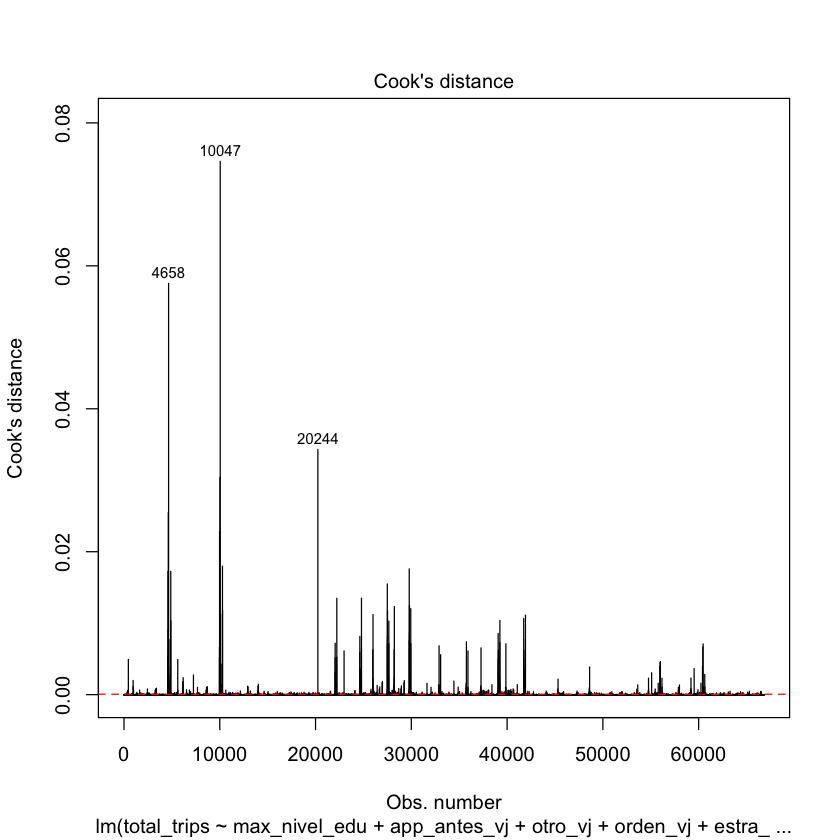

In [64]:
plot(modelo, which=4, cook.levels=corte)
abline(h=corte, lty=2, col="red")

In [65]:
cooksd<-cooks.distance(modelo)
cooksd[which(cooksd>corte)]

230          254          301          304          305          311 
8.384379e-05 1.218850e-04 1.127551e-04 6.416753e-05 8.057265e-05 6.783910e-05 
         312          313          315          316          317          325 
3.374602e-04 7.569284e-05 7.267414e-05 1.972284e-04 8.514400e-05 6.111357e-05 
         384          395          399          400          402          452 
5.686408e-04 1.023205e-04 1.245348e-04 5.594340e-04 6.721545e-05 5.054377e-04 
         453          454          456          457          814          818 
7.061077e-05 6.704008e-04 4.926350e-03 1.102276e-04 1.585137e-04 6.933758e-05 
         898          930          953          956          957          974 
9.692891e-05 1.373537e-04 1.986284e-03 2.110511e-04 1.185636e-03 2.960637e-04 
        1001         1320         1321         1415         1626         1627 
6.994608e-04 2.520117e-04 2.998068e-04 1.753725e-04 6.474474e-04 9.025737e-05 
        1629         1693         1747         1868         1935         1954 
6.882543e-05 2.269150e-04 2.935973e-04 6.036443e-05 1.377033e-04 7.813176e-05 
        2077         2386         2440         2446         2455         2547 
7.280252e-05 2.229206e-04 8.204920e-05 8.008547e-04 1.770150e-04 6.157687e-05 
        2559         2593         2663         2673         2675         3195 
1.344051e-04 2.633117e-04 6.659429e-05 1.006824e-04 1.864447e-04 6.166927e-05 
        3198         3224         3249         3271         3291         3295 
7.421076e-05 2.139094e-04 6.100691e-04 1.148547e-04 9.663261e-05 6.893810e-05 
        3308         3388         3390         3430         3689         3730 
8.246938e-04 9.098013e-05 8.996191e-04 1.574930e-04 7.244350e-05 8.306010e-05 
        3995         4072         4115         4573         4574         4575 
9.699640e-05 6.870871e-05 7.009510e-05 4.476889e-04 5.423288e-03 5.252693e-03 
        4584         4585         4587         4588         4596         4607 
1.141526e-04 1.817010e-04 1.724582e-02 2.173759e-04 3.212880e-04 4.251105e-04 
        4610         4611         4619         4622         4623         4624 
9.137745e-03 7.107898e-05 6.884423e-05 1.583371e-04 8.324355e-05 2.548214e-02 
        4625         4629         4631         4634         4635         4637 
2.447533e-04 2.287095e-04 1.431701e-04 1.347739e-04 8.704607e-05 1.219893e-03 
        4638         4643         4644         4645         4658         4660 
7.795903e-03 2.562859e-03 1.243284e-04 2.116304e-03 5.754617e-02 3.477196e-04 
        4663         4664         4675         4692         4693         4694 
3.819571e-03 6.661088e-05 1.481794e-03 7.702588e-03 7.607144e-05 6.902103e-05 
        4711         4737         4749         4818         4825         4826 
9.738099e-05 6.411889e-05 6.535972e-05 1.393665e-03 6.372245e-05 2.809482e-03 
        4827         4857         4866         4875         4881         4883 
1.119156e-04 6.060883e-05 6.451218e-05 1.449171e-04 9.288465e-05 2.832369e-04 
        4884         4888         4890         4891         4892         4997 
1.725103e-02 8.219400e-05 6.888751e-05 3.725823e-04 1.033458e-02 7.682609e-05 
        5143         5144         5152         5167         5168         5230 
1.330294e-04 1.439451e-04 1.618834e-04 7.128316e-05 1.670697e-04 8.542299e-05 
        5286         5458         5459         5490         5491         5543 
2.816748e-04 7.065697e-05 2.788328e-04 8.670656e-05 3.019557e-04 6.273380e-05 
        5551         5611         5612         5613         5615         5616 
9.852150e-05 5.042548e-04 7.334446e-05 6.671566e-04 4.913051e-03 1.099527e-04 
        5622         5951         5998         6002         6027         6079 
1.495836e-04 8.485416e-05 1.439232e-04 6.894229e-05 8.019474e-05 8.689068e-05 
        6114         6136         6138         6139         6157         6180 
9.340726e-05 1.824705e-03 1.232089e-04 1.476768e-03 3.667955e-04 2.375978e-03 
        6526         6527         6624         6628        

Warning message in plot.window(...):
“"id.method" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"id.method" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"id.method" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"id.method" is not a graphical parameter”
Warning message in box(...):
“"id.method" is not a graphical parameter”
Warning message in title(...):
“"id.method" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"id.method" is not a graphical parameter”


StudRes      Hat         CookD      
4658  5.560213e+01 0.006194596 0.057546171
10047 6.158927e+01 0.006610186 0.074622441
20244 1.780249e-07 1.000000000 0.034311077
22979 0.000000e+00 1.000000000 0.006119975

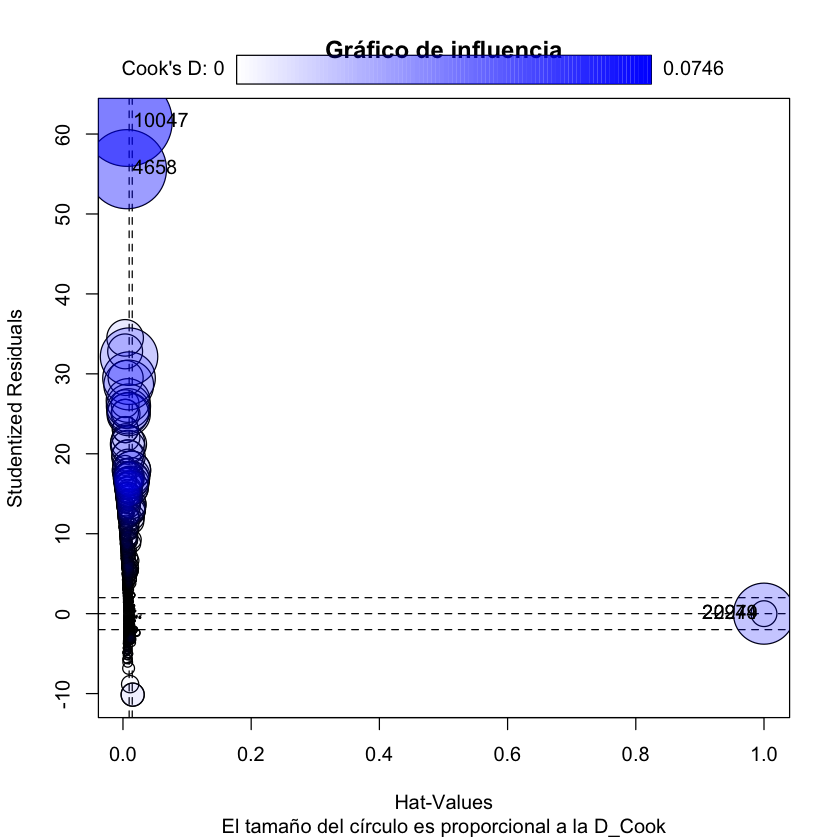

In [66]:
library(car) 
influencePlot(modelo, id.method="identify", main="Gráfico de influencia", sub="El tamaño del círculo es proporcional a la D_Cook")

In [108]:
all_vars <- c('max_nivel_edu','app_antes_vj','otro_vj','orden_vj','estra_hg','etapas','zat_hg','utam_ori','utam_des',
              'weights','mean_duracion','mean_edad_prom','mean_mujeres','mean_modo_a_pie',
              'mean_modo_priv','mean_modo_bici','mean_modo_pub','mean_modo_tax','mean_modo_otro',
              'mean_otro_viaje','mean_freq_todos_dias','mean_freq_varios_dias','mean_freq_otro','mean_madre_cab_familia')

# Validación Iteración 1 (Patrones no explicados)

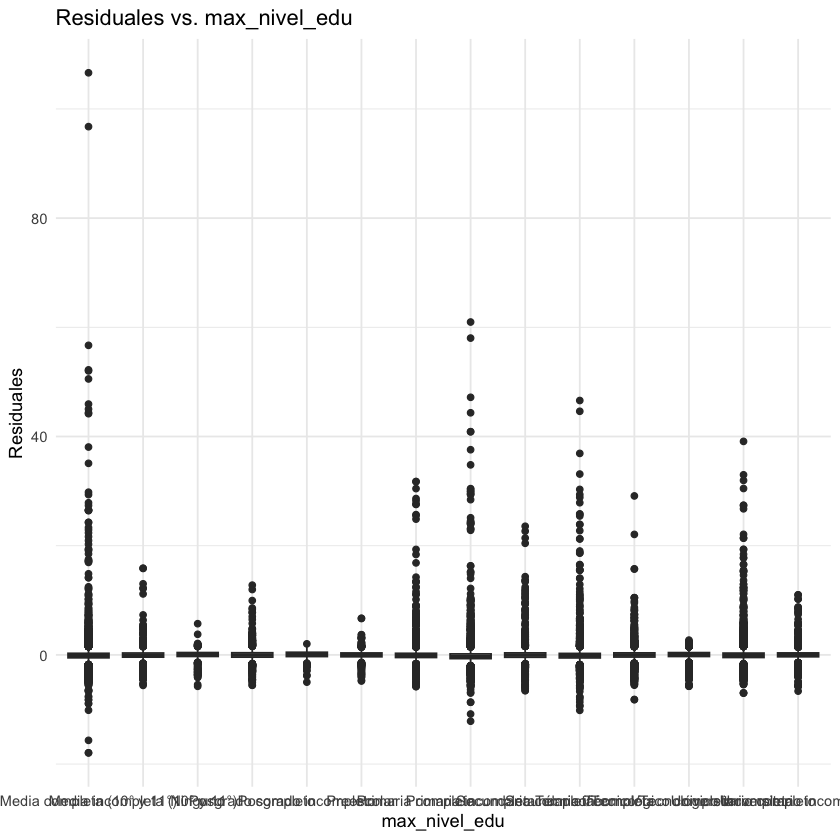

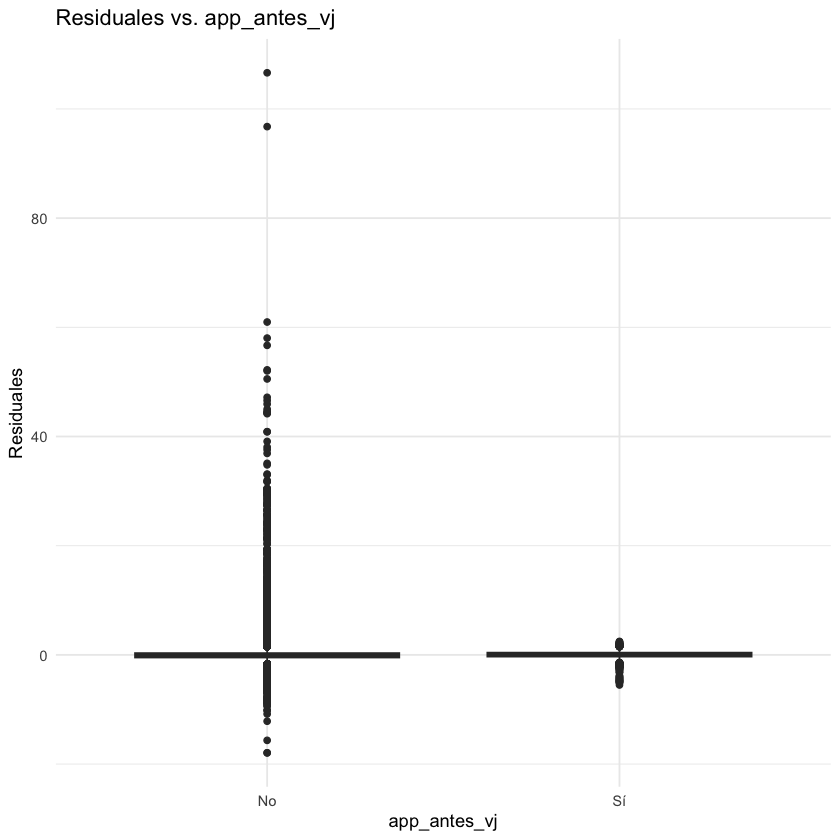

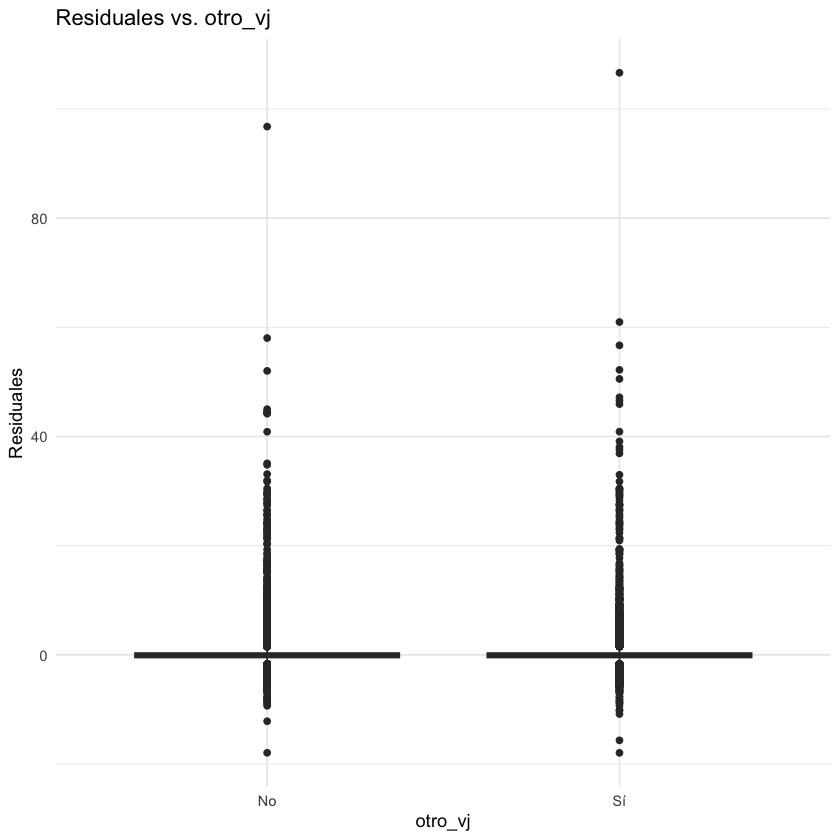

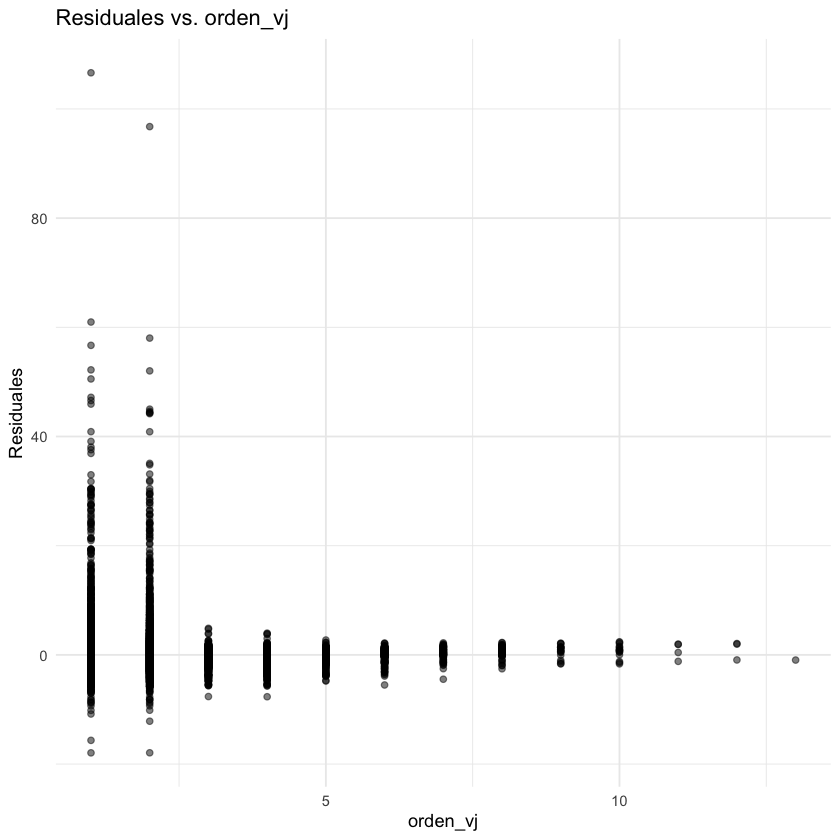

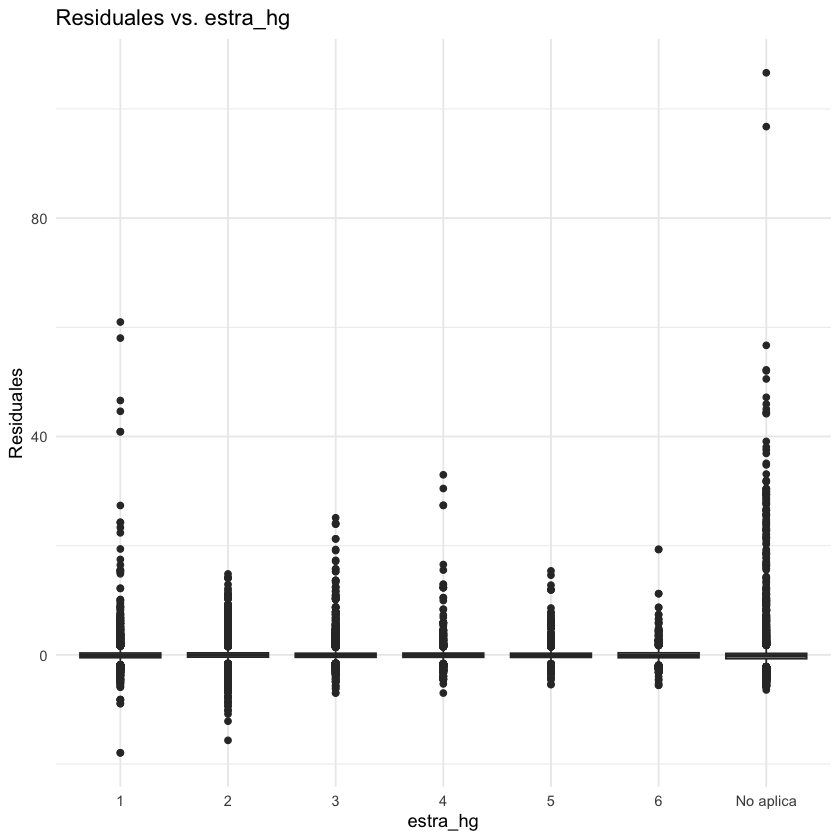

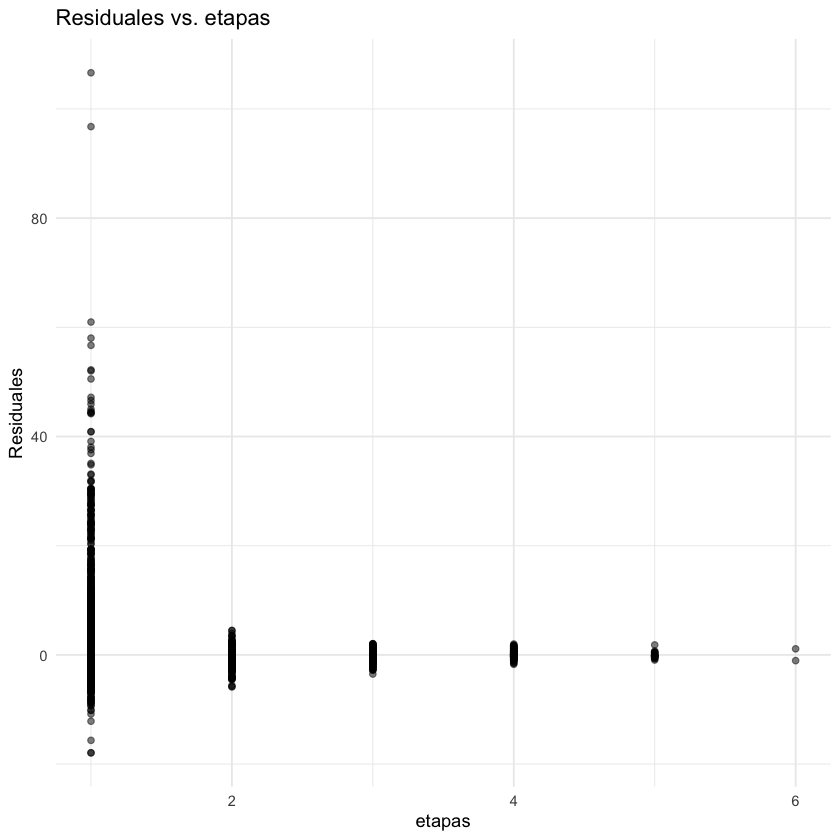

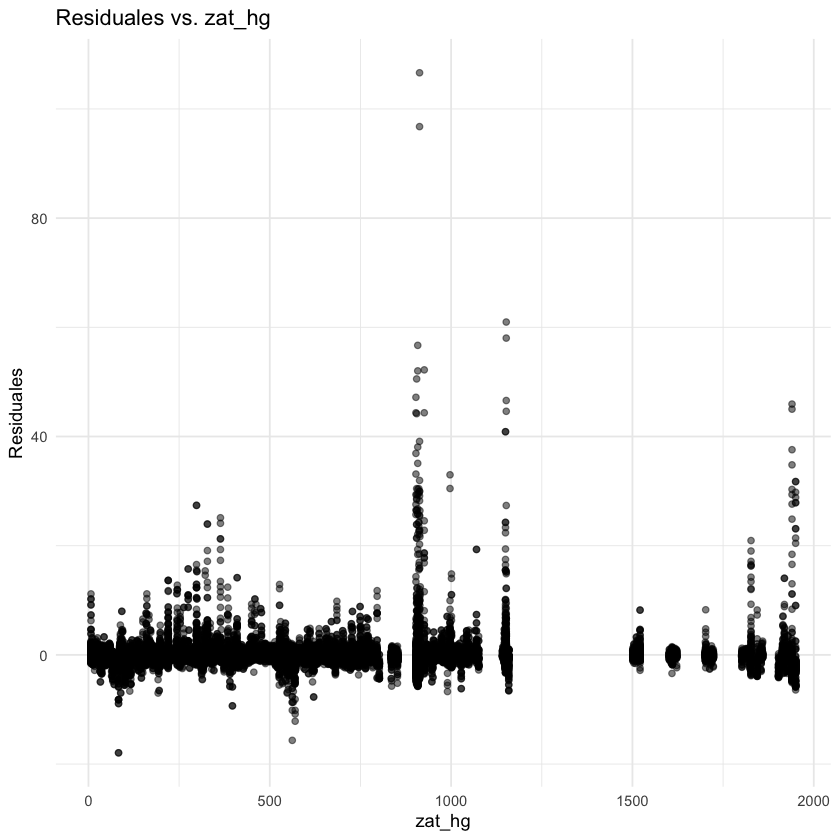

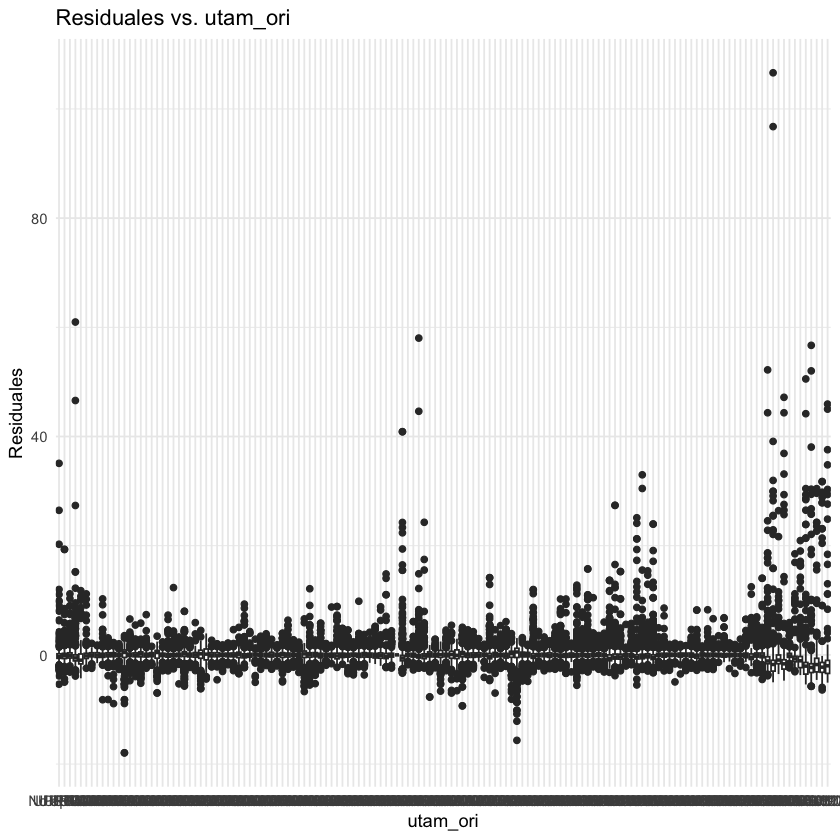

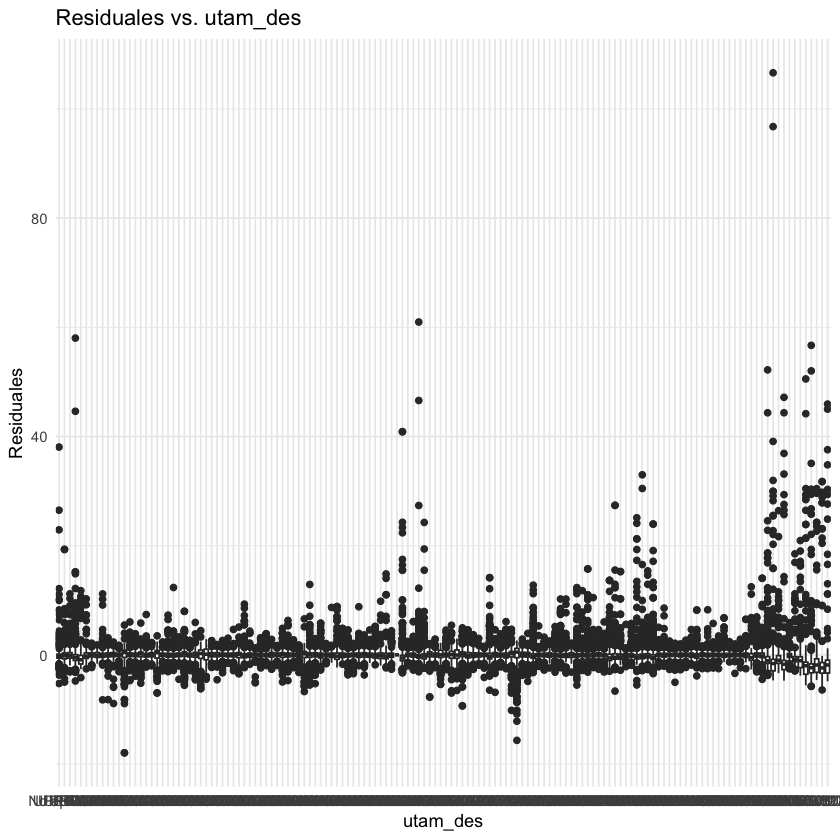

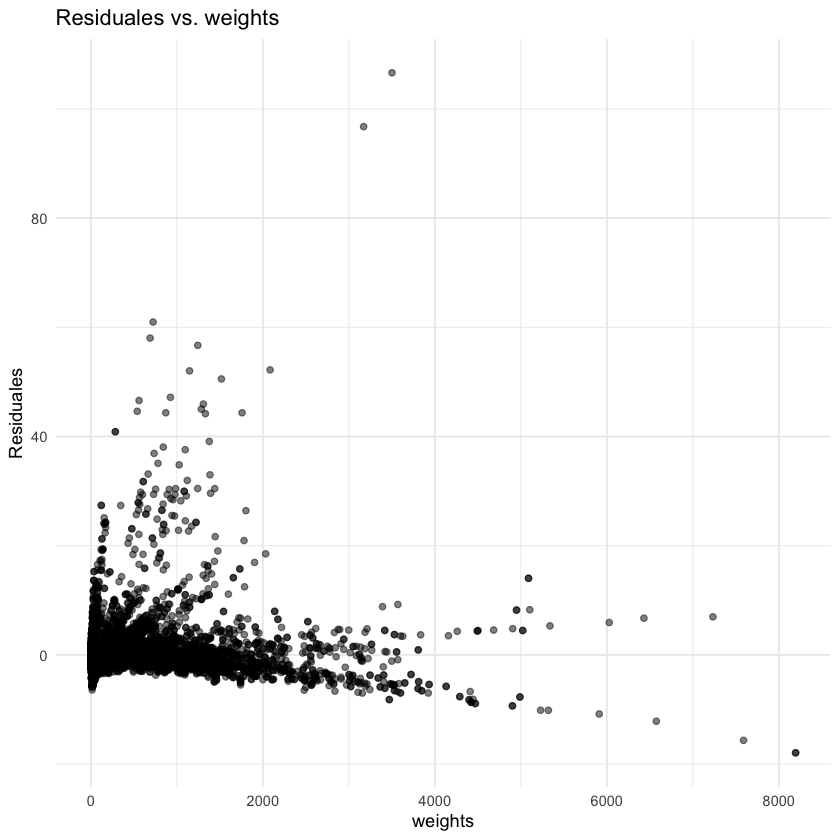

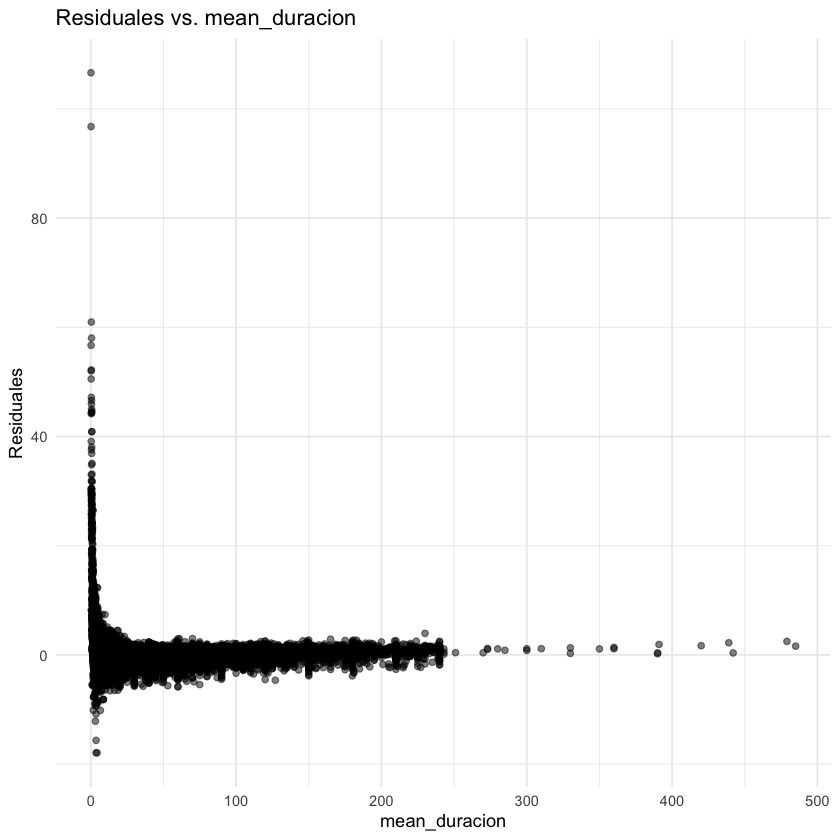

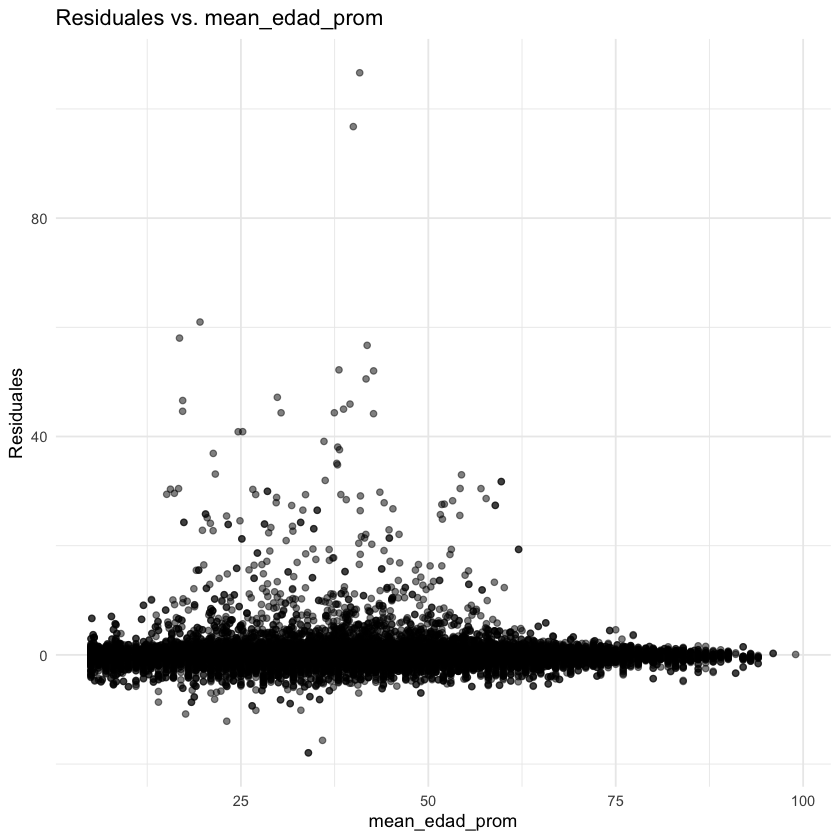

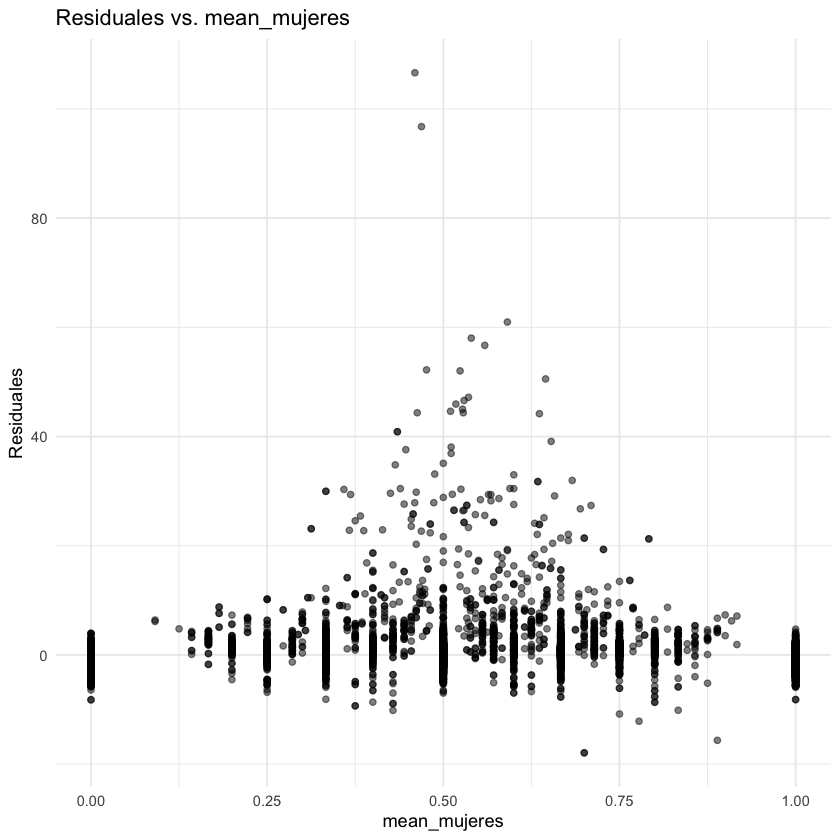

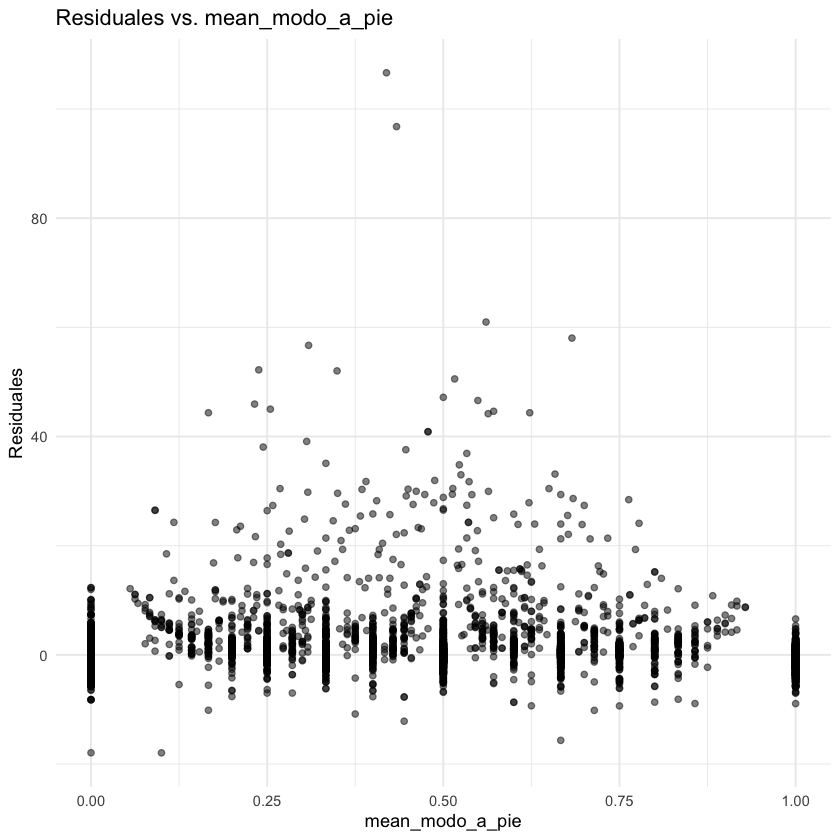

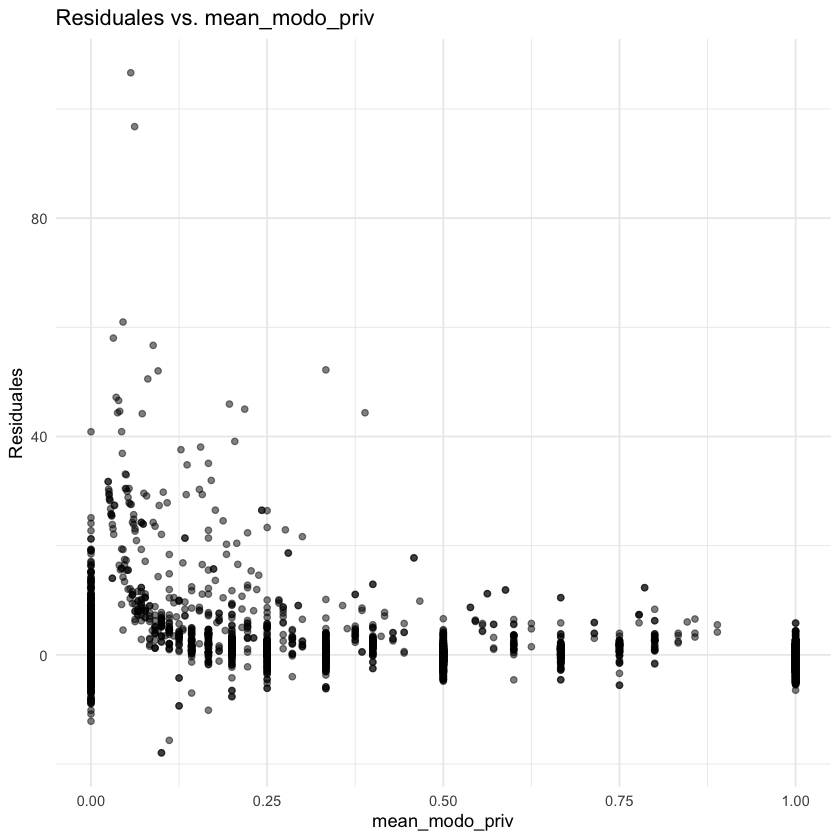

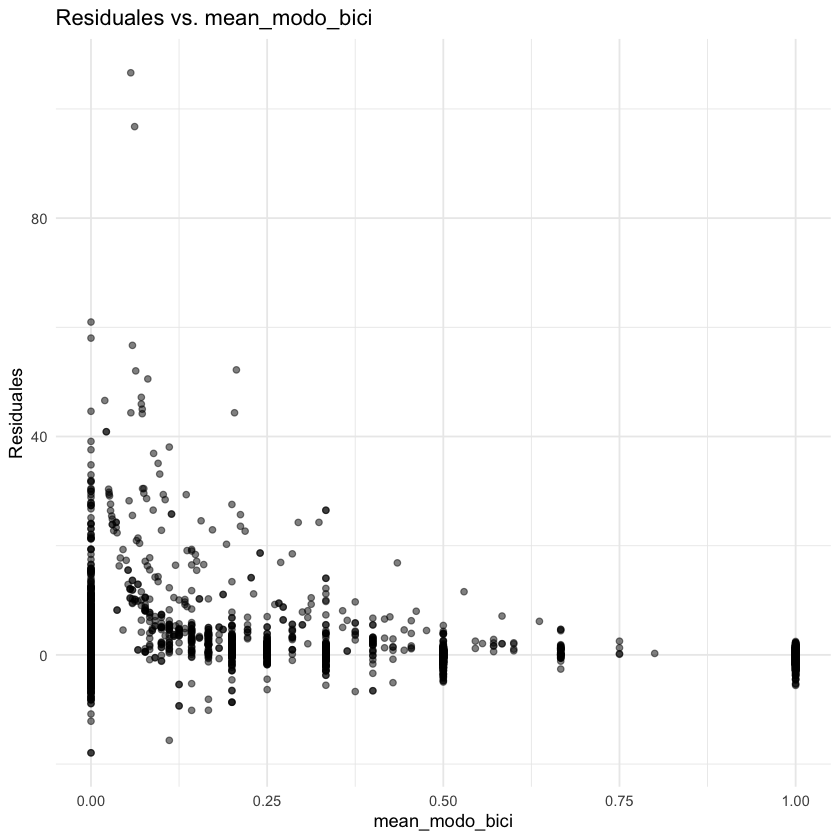

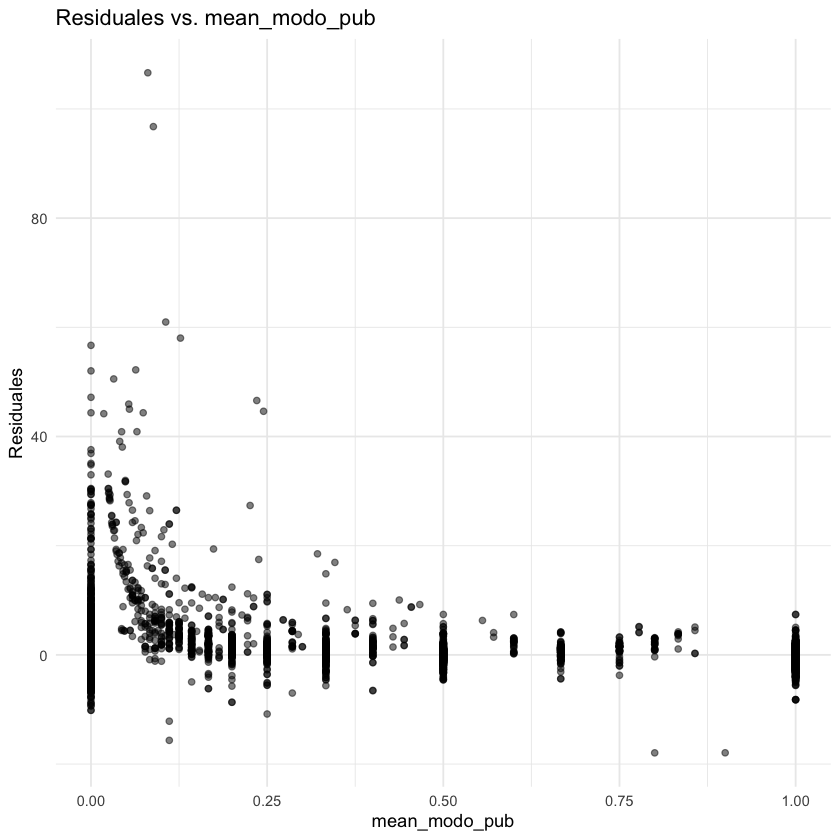

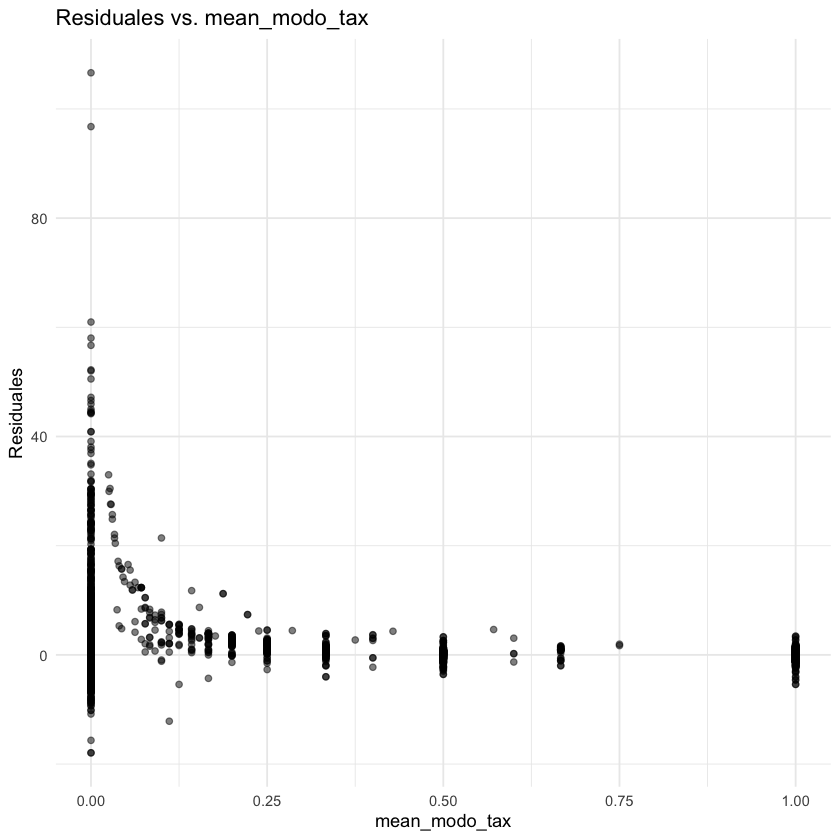

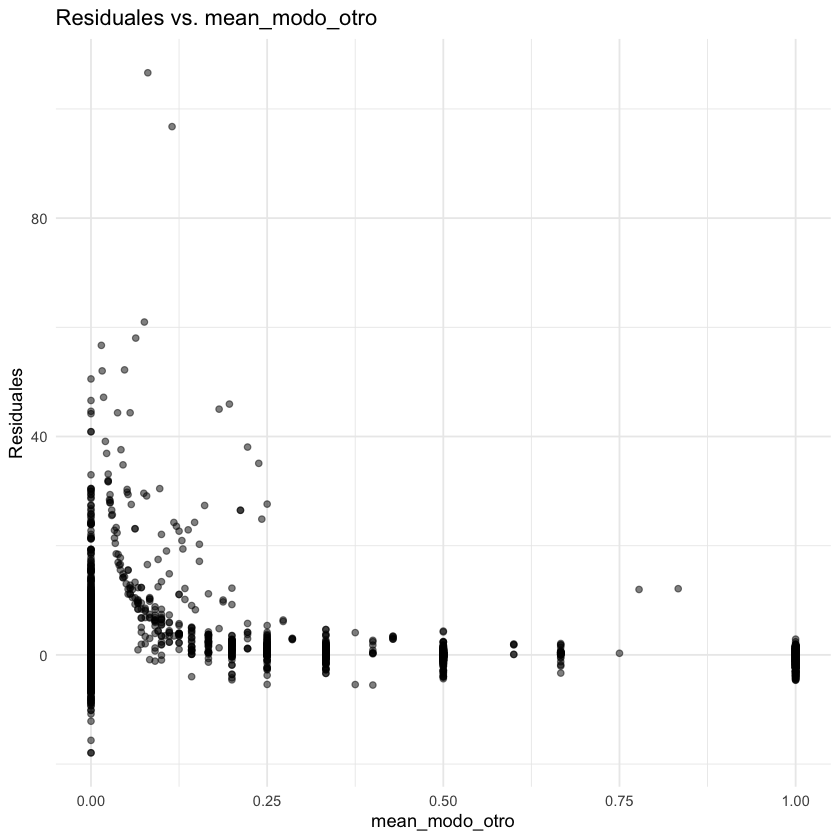

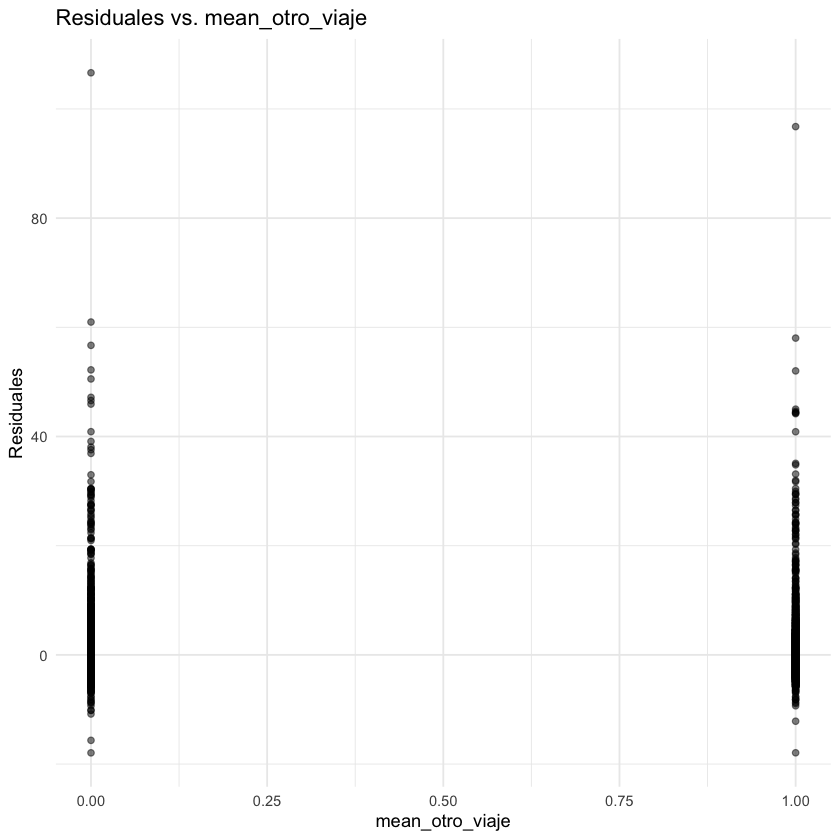

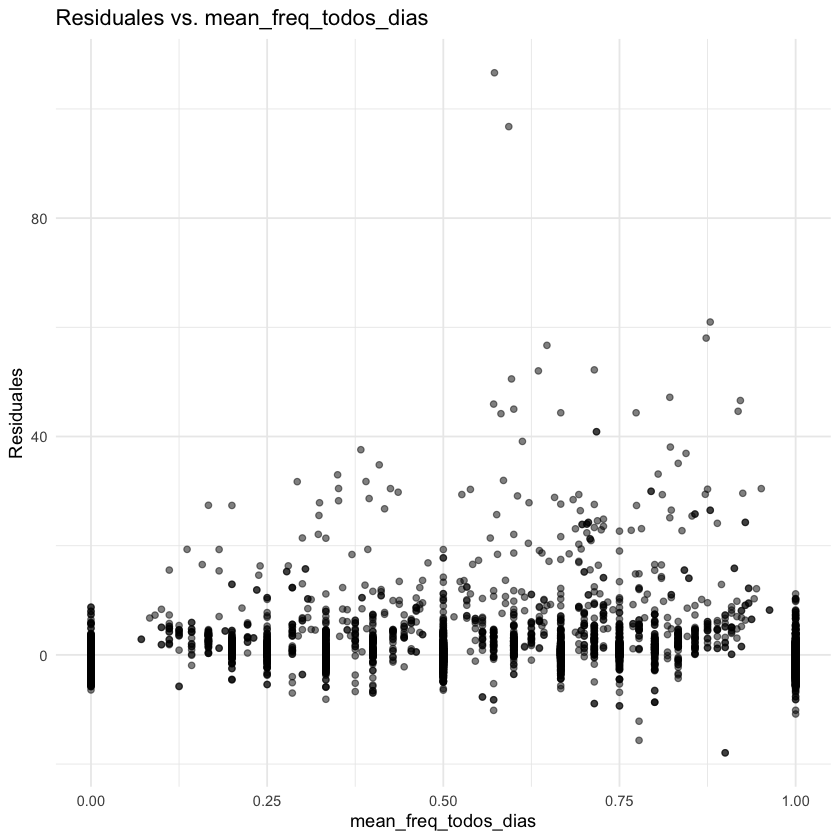

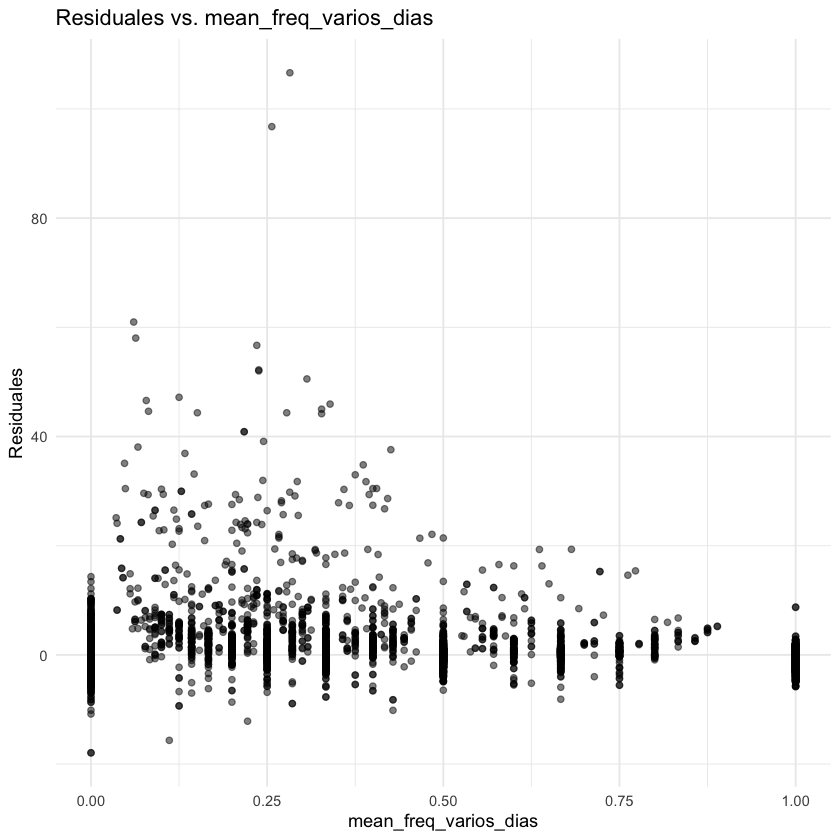

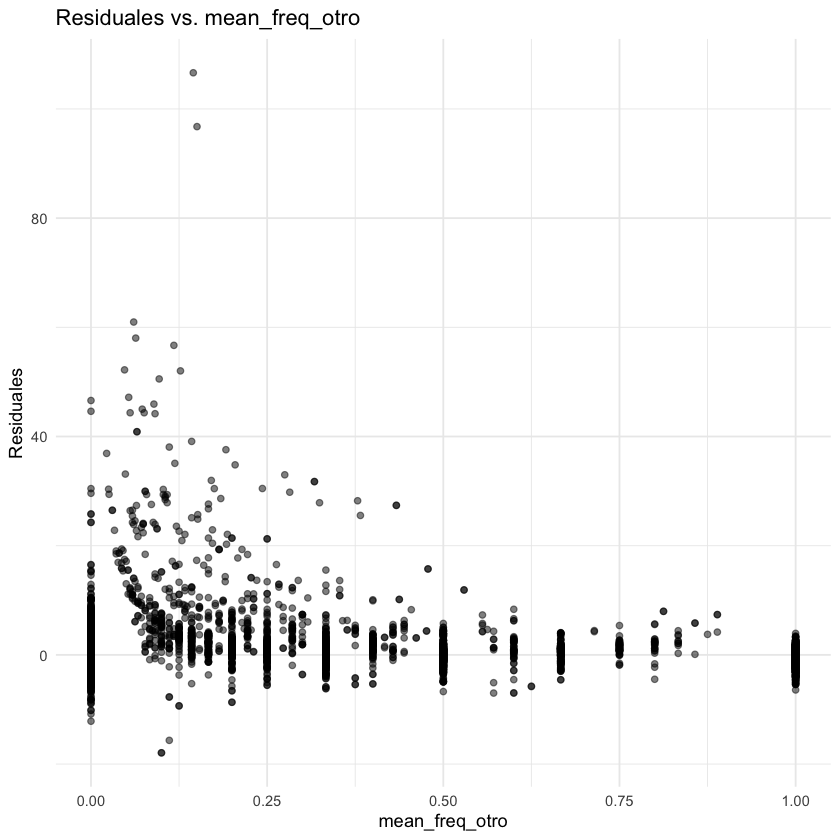

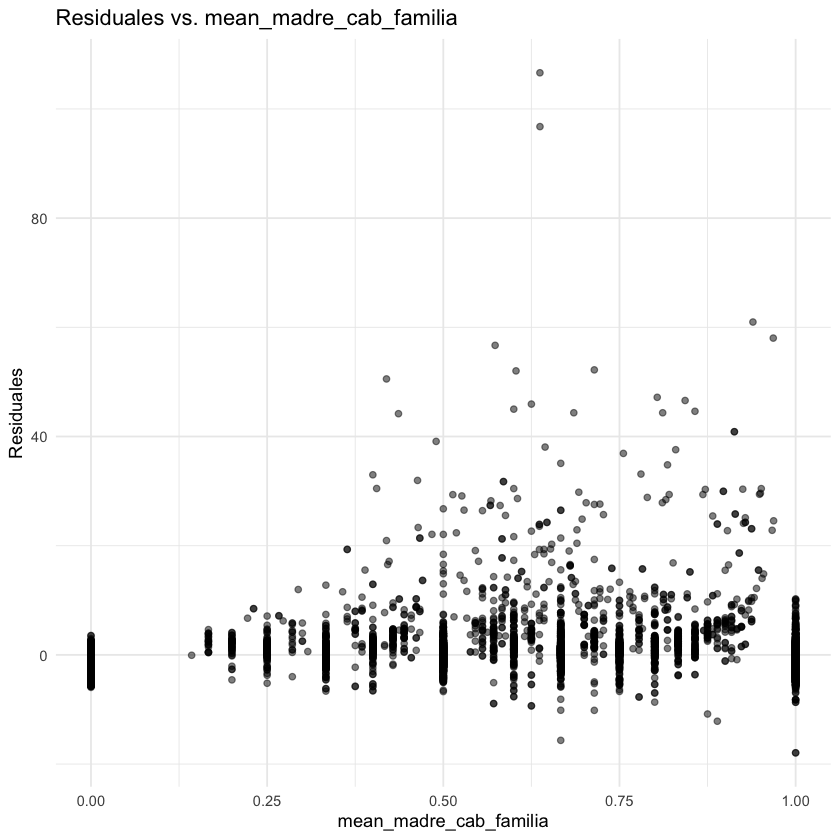

In [116]:

# 1. Calcular los residuales y agregarlos a flow_df
flow_df$resid <- residuals(modelo)

# 2. Escoger las variables (columnas) que quieras revisar
#    (por ejemplo, todas las columnas menos la respuesta y los residuales)
vars <- setdiff(names(flow_df), c("total_trips", "resid"))

# 3. Iterar sobre esas columnas y graficar
for (v in vars) {
  # Si la variable es numérica, usamos un scatter plot
  if (is.numeric(flow_df[[v]])) {
    p <- ggplot(flow_df, aes_string(x = v, y = "resid")) +
      geom_point(alpha = 0.5) +
      labs(
        title = paste("Residuales vs.", v),
        x = v,
        y = "Residuales"
      ) +
      theme_minimal()
  } else {
    # Si la variable es categórica, usamos un boxplot
    p <- ggplot(flow_df, aes_string(x = v, y = "resid")) +
      geom_boxplot() +
      labs(
        title = paste("Residuales vs.", v),
        x = v,
        y = "Residuales"
      ) +
      theme_minimal()
  }
  
  print(p)
}

flow_df$resid <- NULL

En términos generales, estos gráficos de residuos vs. distintas variables muestran que:
	
    1.	Hay bastantes valores atípicos (outliers) con residuos muy altos (por encima de 40 e incluso 80). Esto sugiere que el modelo está subestimando o sobreestimando algunos puntos de forma significativa.
	2.	Mucha concentración de puntos cerca de 0: La mayoría de observaciones tienen residuos relativamente pequeños, pero unos cuantos casos se alejan bastante.
	3.	Categorías con la mayor parte de los residuos en 0 y unos cuantos valores grandes (por ejemplo, max_nivel_edu, app_antes_vj, otro_vj, estra_hg):
	•	Indica que, para la mayoría de los niveles de esas variables, el modelo no comete grandes errores, pero en unas pocas filas hay un desacierto importante.
	•	También podría reflejar que el modelo no capta adecuadamente ciertas combinaciones de categorías (por ejemplo, estrato 6 o “No aplica”, donde se ven outliers).
	4.	Para variables numéricas como orden_vj, etapas:
	•	Se ve que para valores pequeños de orden_vj (1 o 2) hay mucha dispersión de residuos, mientras que para valores mayores (5, 10) los residuos se acercan más a 0. Esto podría implicar que el modelo no está capturando alguna dinámica específica de los primeros viajes.
	•	En etapas, casi todo se concentra en 1 etapa, y de nuevo aparecen outliers altos allí.
	5.	Caso particular de weights:
	•	El diagrama sugiere una especie de “abanico”: a medida que weights crece, los residuos se dispersan más (hay más amplitud).
	•	Esto es un posible indicador de heterocedasticidad: el error del modelo crece conforme aumenta la variable weights.
	•	Si weights es un factor de expansión o algo similar, podría requerir un tratamiento diferente en la especificación del modelo.
	6.	Variables que son identificadores (p. ej. zat_hg, utam_ori, utam_des):
	•	Se observa que ciertas zonas (IDs) presentan residuos muy altos, mientras otras se concentran cerca de 0.
	•	Esto puede significar que el modelo no está incluyendo las variables o interacciones necesarias para capturar diferencias entre zonas específicas.

Conclusiones y pasos posibles

    •	La presencia de outliers en varias variables (tanto categóricas como numéricas) indica que el modelo actual subestima o sobreestima de manera importante ciertos casos.
	•	El efecto “abanico” con weights sugiere heterocedasticidad; podrías contemplar correcciones (modelos robustos, transformaciones, etc.).
	•	Las variables ID con concentraciones de residuos altos podrían requerir efectos fijos o aleatorios (p. ej., un modelo mixto por zona) o variables adicionales que expliquen esas diferencias.
	•	Revisar si un modelo de conteo (Poisson, NegBin) o alguna transformación (log) es más apropiado, dado que se manejan viajes (valores enteros) y se ven muchos ceros y pocos valores muy altos.

En resumen, los gráficos muestran que el modelo deja errores sistemáticos en ciertos grupos de datos y puede necesitar variables o formas funcionales adicionales (o un enfoque distinto) para explicar mejor la variabilidad en total_trips.

In [119]:
install.packages('zoo')


The downloaded binary packages are in
	/var/folders/2n/6279gdws5ts9yfc23grg1ztm0000gn/T//Rtmpzbz5ER/downloaded_packages


In [166]:
library(lmtest)
resettest(modelo,type="fitted")


	RESET test

data:  modelo
RESET = 4539.5, df1 = 2, df2 = 66499, p-value < 2.2e-16


Interpretación
	1.	Hipótesis nula (H_0):
El modelo está correctamente especificado, es decir, no faltan variables relevantes ni hay una forma funcional incorrecta.
	2.	Hipótesis alternativa (H_1):
El modelo está mal especificado (faltan variables, hay no linealidades no contempladas, etc.).
	3.	p-value < 2.2e-16:
Este valor extremadamente bajo indica que hay evidencia estadísticamente muy fuerte para rechazar la hipótesis nula. En otras palabras, el modelo actual no parece capturar toda la estructura de los datos, sugiriendo la necesidad de:
	•	Agregar variables o transformaciones (por ejemplo, términos polinómicos, interacciones).
	•	Probar otra forma funcional (por ejemplo, logaritmos, modelos no lineales).
	•	Considerar que puede haber variables omitidas relevantes o que las relaciones no sean estrictamente lineales.

En resumen, con un p-value tan pequeño, el RESET test sugiere que el modelo actual no está adecuadamente especificado y podría mejorarse incorporando nuevos predictores, transformaciones o un enfoque de modelado distinto.

# Validación Iteración 1 (Multicolinealidad)

In [180]:
vif(modelo)

ERROR: Error in vif.default(modelo): there are aliased coefficients in the model


Este error “there are aliased coefficients in the model” ocurre cuando el modelo de regresión tiene colinealidad perfecta o casi perfecta entre algunas variables, provocando que ciertos coeficientes estén completamente determinados (o “aliased”). En otras palabras, una o varias variables pueden expresarse exactamente como combinación lineal de otras, por lo que R elimina (o “alia”) esos coeficientes.

In [182]:
alias(modelo)

Model :
total_trips ~ max_nivel_edu + app_antes_vj + otro_vj + orden_vj + 
    estra_hg + etapas + zat_hg + utam_ori + utam_des + +weights + 
    mean_duracion + mean_edad_prom + mean_mujeres + mean_modo_a_pie + 
    mean_modo_priv + mean_modo_bici + mean_modo_pub + mean_modo_tax + 
    mean_modo_otro + mean_otro_viaje + mean_freq_todos_dias + 
    mean_freq_varios_dias + mean_freq_otro + mean_madre_cab_familia

Complete :
                (Intercept) max_nivel_eduMedia incompleta (10° y 11°)
mean_otro_viaje  1           0                                       
mean_freq_otro   1           0                                       
                max_nivel_eduNinguno max_nivel_eduPosgrado completo
mean_otro_viaje  0                    0                            
mean_freq_otro   0                    0                            
                max_nivel_eduPosgrado incompleto max_nivel_eduPreescolar
mean_otro_viaje  0                                0                     
mean_freq_otr

#### Conclusión Iteración 1.
Necesario transformar variables e intentar otras estrategias.


---

# Segunda Iteración

# Identificación Iteración 2

### Eliminando las variables mean_otro_viaje mean_freq_otro

In [66]:
library(ggplot2)

# Lista de variables independientes (predictoras) en el modelo
vars <- c(
  'total_trips', "max_nivel_edu", "app_antes_vj", "otro_vj", "orden_vj", 
  "estra_hg", "etapas", "zat_hg", "utam_ori", "utam_des", "weights",
  "mean_duracion", "mean_edad_prom", "mean_mujeres", "mean_modo_a_pie",
  "mean_modo_priv", "mean_modo_bici", "mean_modo_pub", "mean_modo_tax",
  "mean_modo_otro", "mean_otro_viaje", "mean_freq_todos_dias",
  "mean_freq_varios_dias", "mean_freq_otro", "mean_madre_cab_familia"
)
flow_df2 = flow_df[vars]

library(GGally)
num_vars <- c("total_trips", "etapas", "weights", 
              "mean_duracion", "mean_edad_prom", "mean_mujeres",
              "mean_modo_a_pie", "mean_modo_priv", "mean_modo_bici", 
              "mean_modo_pub", "mean_modo_tax", "mean_modo_otro")
flow_df_numeric2 <- flow_df[num_vars]
flow_df_numeric2$total_trips <- log(flow_df_numeric2$total_trips )
flow_df_numeric2$weights <- log(flow_df_numeric2$weights)
flow_df_numeric2$mean_duracion <- log(flow_df_numeric2$mean_duracion )

p2 <- ggpairs(flow_df_numeric2)
psp2 <- ggpairs(flow_df_numeric2,
        upper = list(continuous = wrap("cor", method = "spearman")))

In [207]:
ggsave("scatterplot_matrix2.png", plot = p2, width = 12, height = 8, dpi = 250)

In [ ]:
ggsave("scatterplot_matrixPSP2.png", plot = psp2, width = 12, height = 8, dpi = 250)

### Matriz de diagrama de dispersion y correlaciones (Pearson)

![Diagrama de dispersión](./scatterplot_matrix2.png "Matrix Scatter Plot")

### Matriz de diagrama de dispersion y correlaciones (Spearman)

![Diagrama de dispersión](./scatterplot_matrixPSP2.png "Matrix Scatter Plot")

# Estimación e inferencia Iteración 2

In [224]:

modelo2 <- lm(
  log(total_trips) ~ max_nivel_edu + app_antes_vj + otro_vj + orden_vj + estra_hg + etapas + zat_hg + utam_ori + utam_des + 
    + (weights) + log(mean_duracion) + (mean_edad_prom) + mean_mujeres + mean_modo_a_pie + mean_modo_priv +
    mean_modo_bici + mean_modo_pub + mean_modo_tax + mean_modo_otro + mean_freq_todos_dias +
    mean_freq_varios_dias + mean_madre_cab_familia,
  data = flow_df2
)

summary(modelo2)


Call:
lm(formula = log(total_trips) ~ max_nivel_edu + app_antes_vj + 
    otro_vj + orden_vj + estra_hg + etapas + zat_hg + utam_ori + 
    utam_des + +(weights) + log(mean_duracion) + (mean_edad_prom) + 
    mean_mujeres + mean_modo_a_pie + mean_modo_priv + mean_modo_bici + 
    mean_modo_pub + mean_modo_tax + mean_modo_otro + mean_freq_todos_dias + 
    mean_freq_varios_dias + mean_madre_cab_familia, data = flow_df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5802 -0.1837 -0.0293  0.1442  2.2705 

Coefficients:
                                              Estimate Std. Error  t value
(Intercept)                                  1.063e+00  2.187e-02   48.614
max_nivel_eduMedia incompleta (10° y 11°)   -6.823e-02  7.117e-03   -9.587
max_nivel_eduNinguno                        -1.150e-01  1.079e-02  -10.661
max_nivel_eduPosgrado completo              -6.762e-02  6.429e-03  -10.518
max_nivel_eduPosgrado incompleto            -1.568e-01  1.769e-02   -8.863
max_nivel_eduPree

# Validación Iteración 2 (Patrones no explicados)

In [225]:
library(lmtest)
resettest(modelo2,type="fitted")


	RESET test

data:  modelo2
RESET = 6271.1, df1 = 2, df2 = 66501, p-value < 2.2e-16


El resultado de la prueba RESET sigue siendo el mismo para esta iteración

In [226]:
vif(modelo2)

GVIF         Df  GVIF^(1/(2*Df))
max_nivel_edu          2.335006e+00  13 1.033154       
app_antes_vj           1.095823e+00   1 1.046815       
otro_vj                1.688789e+00   1 1.299534       
orden_vj               1.437936e+00   1 1.199140       
estra_hg               7.624383e+01   6 1.434995       
etapas                 1.310650e+00   1 1.144836       
zat_hg                 4.048109e+00   1 2.011991       
utam_ori               1.238583e+05 141 1.042461       
utam_des               1.135019e+05 141 1.042139       
weights                1.647691e+00   1 1.283624       
log(mean_duracion)     2.059746e+00   1 1.435182       
mean_edad_prom         1.454360e+00   1 1.205969       
mean_mujeres           2.157837e+00   1 1.468958       
mean_modo_a_pie        2.631989e+00   1 1.622341       
mean_modo_priv         3.580499e+00   1 1.892221       
mean_modo_bici         1.713603e+00   1 1.309047       
mean_modo_pub          5.122537e+00   1 2.263302       
mean_modo_tax          1.567082e+00   1 1.251831       
mean_modo_otro         1.444225e+00   1 1.201759       
mean_freq_todos_dias   1.872688e+00   1 1.368462       
mean_freq_varios_dias  1.627051e+00   1 1.275559       
mean_madre_cab_familia 2.148706e+00   1 1.465847

	•	utam_ori tiene un GVIF gigantesco (1.215066e+05) y 141 df. Pero su GVIF^(1/(2*Df)) = 1.042391, un valor cercano a 1.0, lo que sugiere que no hay un gran problema de colinealidad con esa variable, una vez que se tiene en cuenta que es un factor con muchísimos niveles.
	•	estra_hg (df=6) muestra un GVIF de ~76.3, pero GVIF^(1/(2*6)) ≈ 1.435, también por debajo de 2.
	•	Para variables continuas (o dummies a 1 df) como mean_modo_pub, el VIF crudo (4.253441) es interpretado directamente, y su raíz 2.06 sugiere algo de colinealidad, pero no excesiva.
	•	Casi todos los valores están por debajo de 2, lo cual indica que no hay un problema serio de multicolinealidad.
	•	Aunque los GVIF “crudos” para utam_ori o utam_des son enormes, la corrección por sus altos grados de libertad los deja en ~1.04, un valor inofensivo.
	•	Por tanto, no parece haber una colinealidad severa en el modelo, según estos resultados.

# Validación Iteración 2 (Heteroscedasticidad)

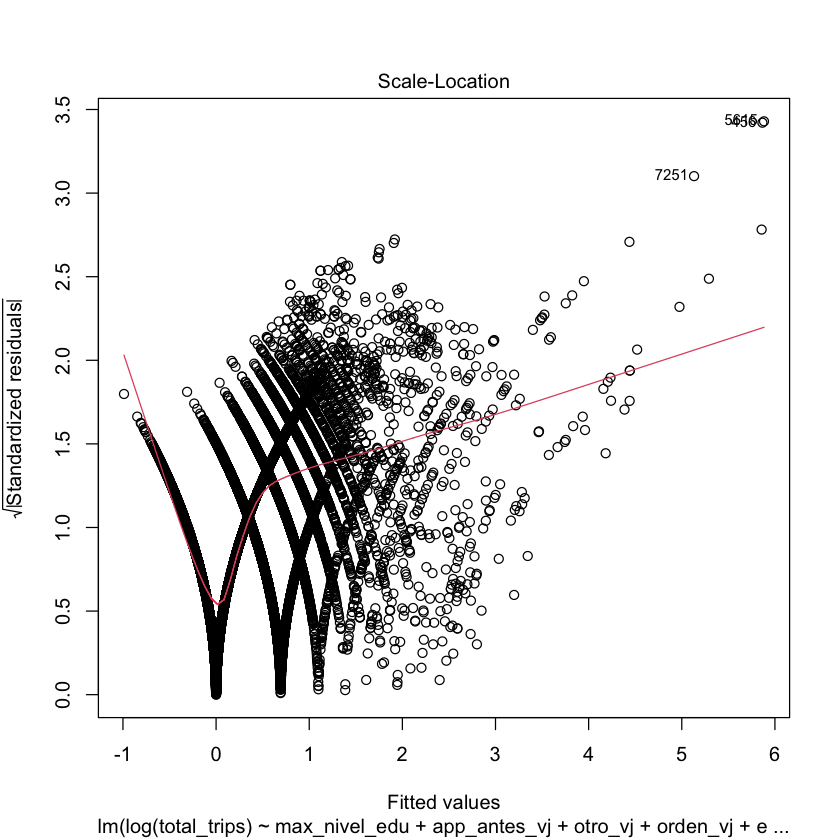

In [227]:
# Scale-Location plot para ver la varianza de los residuos vs. valores ajustados
plot(modelo2, which = 3)

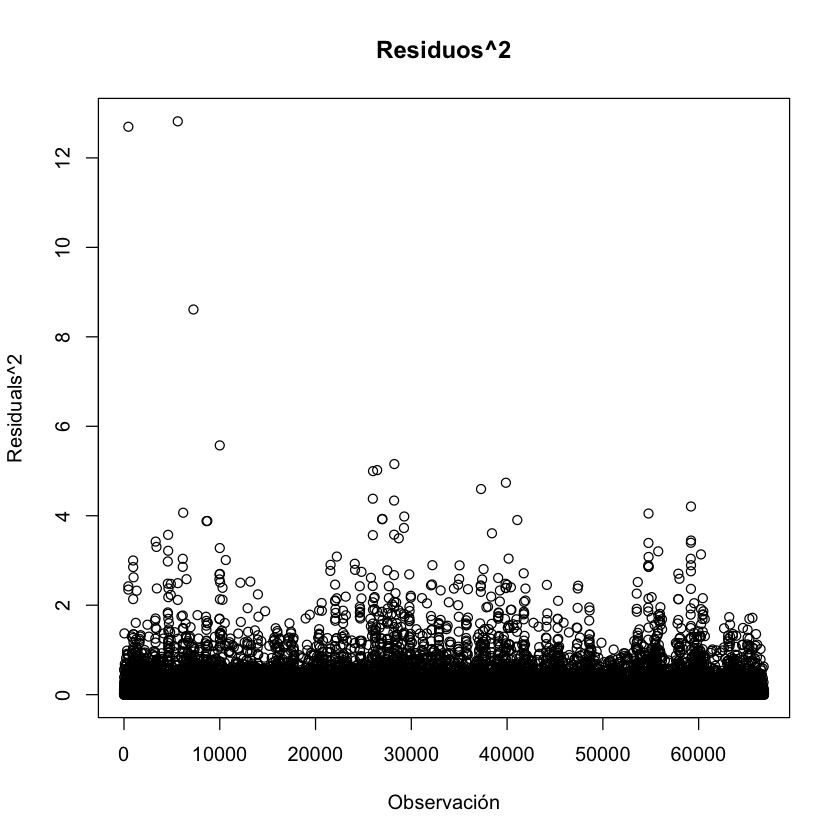

In [228]:

# Graficar los residuos al cuadrado
plot(modelo2$residuals^2, 
     main = "Residuos^2", 
     ylab = "Residuals^2", 
     xlab = "Observación")

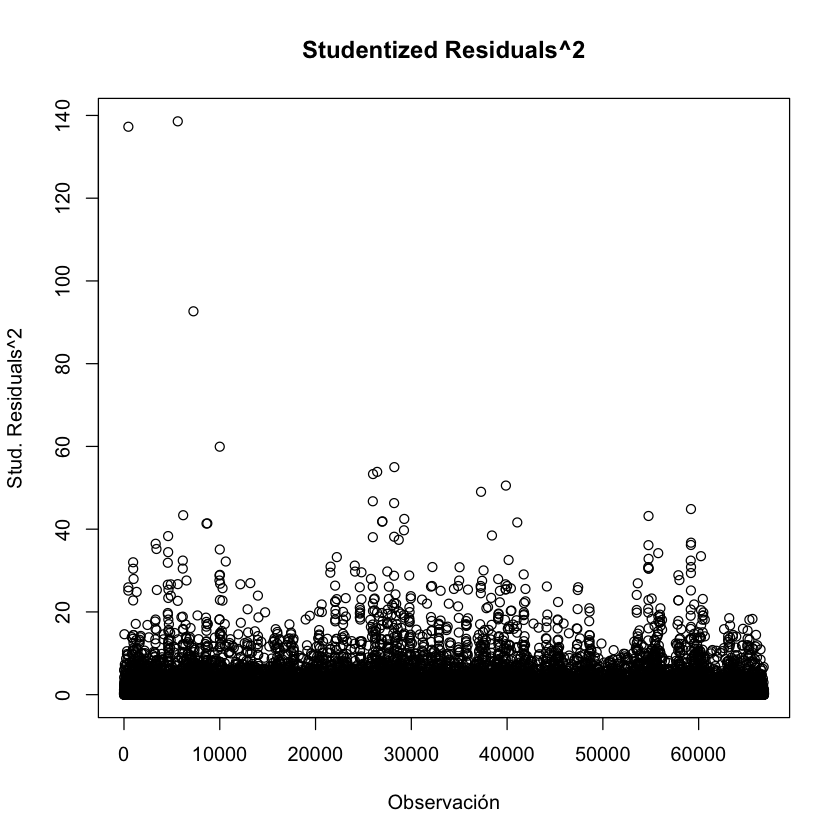

In [229]:
# Supongamos que quieres los residuos studentizados
stud_res <- rstudent(modelo2)
plot(stud_res^2, 
     main = "Studentized Residuals^2", 
     ylab = "Stud. Residuals^2", 
     xlab = "Observación")

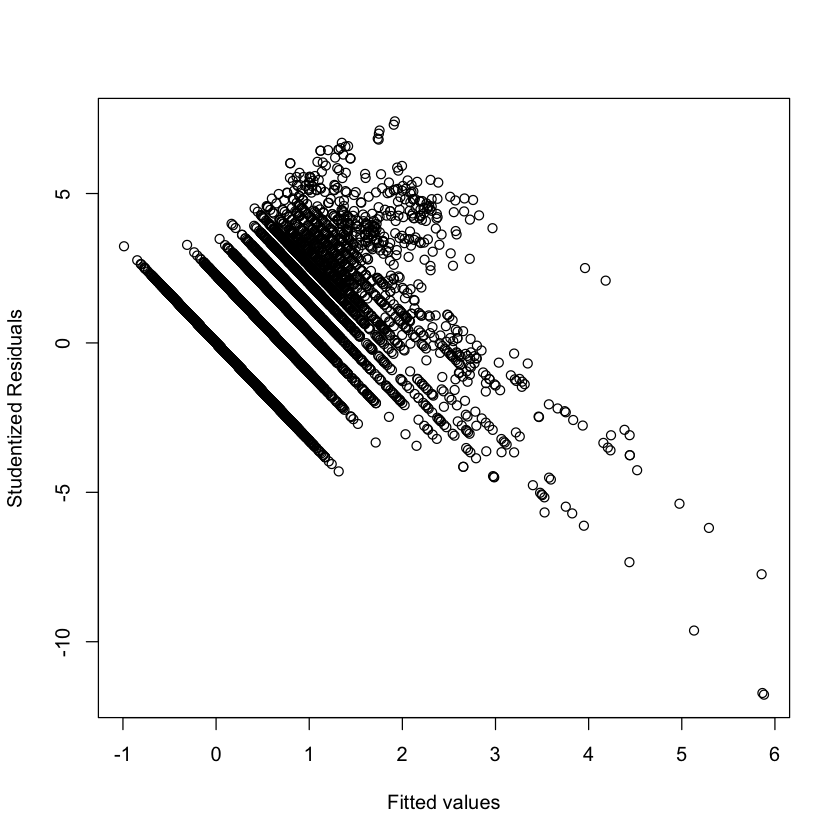

In [230]:


# Graficar fitted values vs. studentized residuals
plot(fitted(modelo2), stud_res,
     xlab = "Fitted values",
     ylab = "Studentized Residuals")



1.	Scale–Location Plot (residuos estandarizados vs. valores ajustados)
    
	•	Se observa un “abanico” que se abre conforme crecen los valores ajustados.
	•	Esto sugiere heterocedasticidad: la varianza de los errores parece aumentar con los valores predichos.
	•	También se ve un hueco inicial (valores negativos en el eje de residuos estandarizados), indicando que el modelo podría estar sobreajustando o subajustando sistemáticamente en esa zona.
	
2.	Residuos^2 y Residuos Studentizados^2 vs. índice (Observación)
    
	•	Muestran muchos puntos cerca de 0, pero también varios valores muy altos (outliers de los residuos).
	•	Algunos alcanzan valores por encima de 1000, 2000 o más, lo que indica que el modelo deja errores muy grandes en ciertos casos.
	•	La presencia de outliers sugiere que el modelo no captura bien esos puntos o que podrían existir datos anómalos.

3.	Fitted values vs. Studentized Residuals
    
	•	Una nube dispersa con tendencia a formar un “abanico” o un patrón asimétrico refuerza la hipótesis de heterocedasticidad.
	•	Si los puntos no se distribuyen aleatoriamente alrededor de 0, hay evidencia de no linealidad o variables omitidas.

# Validación Iteración 2 (Normalidad)

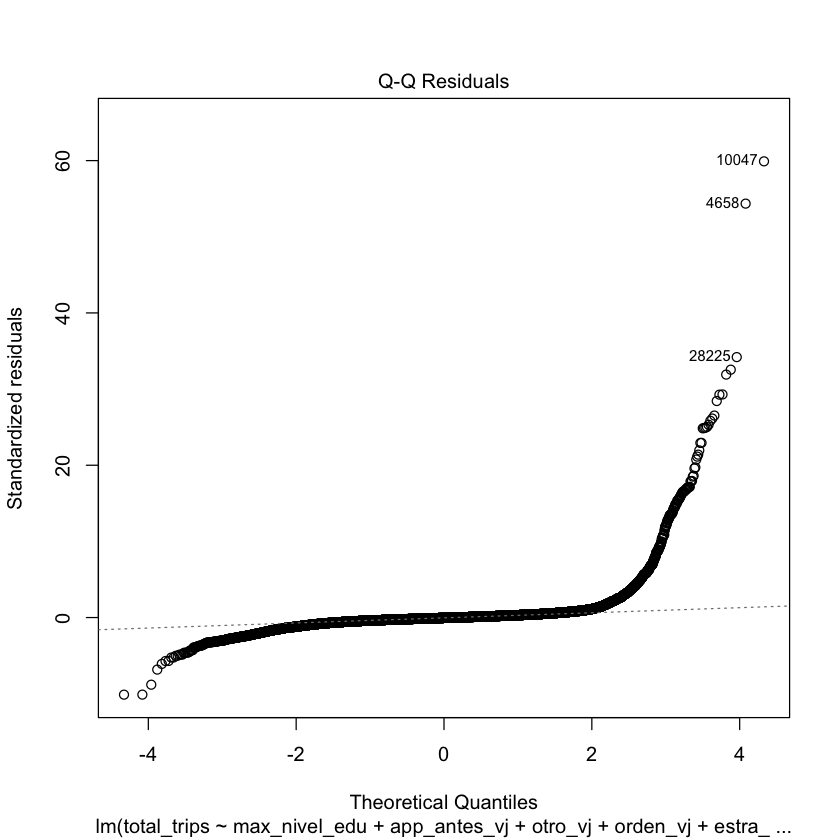

In [133]:
# Graficar Q-Q plot de residuos
plot(modelo, which = 2)


In [134]:
# Obtener residuos studentizados
stud_res <- rstudent(modelo)

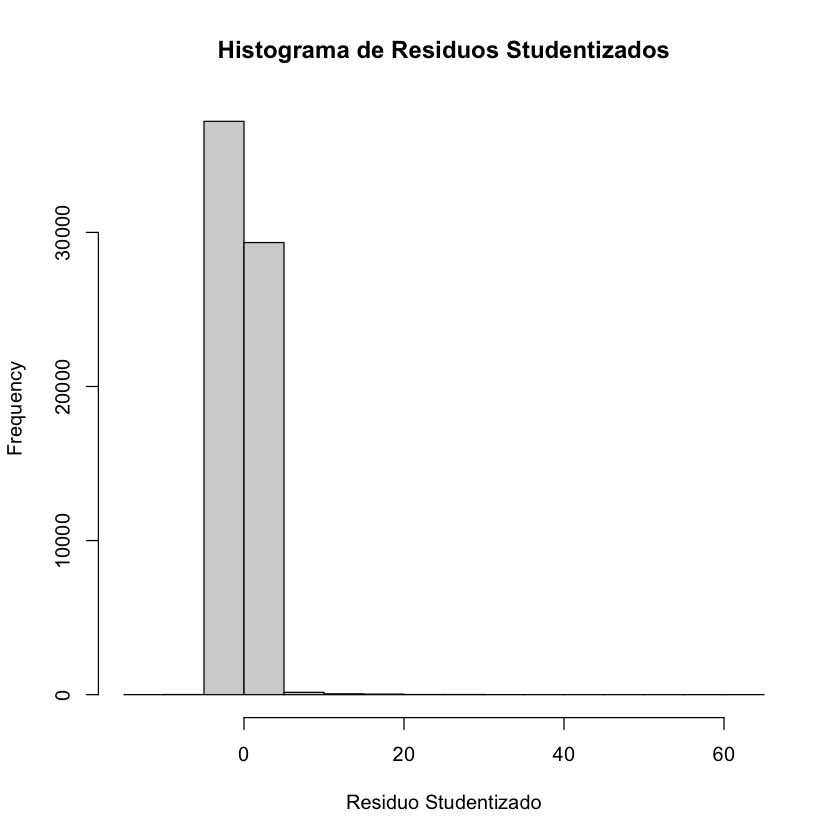

In [135]:
# Histograma de los residuos studentizados
hist(stud_res, 
     main = "Histograma de Residuos Studentizados",
     xlab = "Residuo Studentizado")

[1] 10047  4658

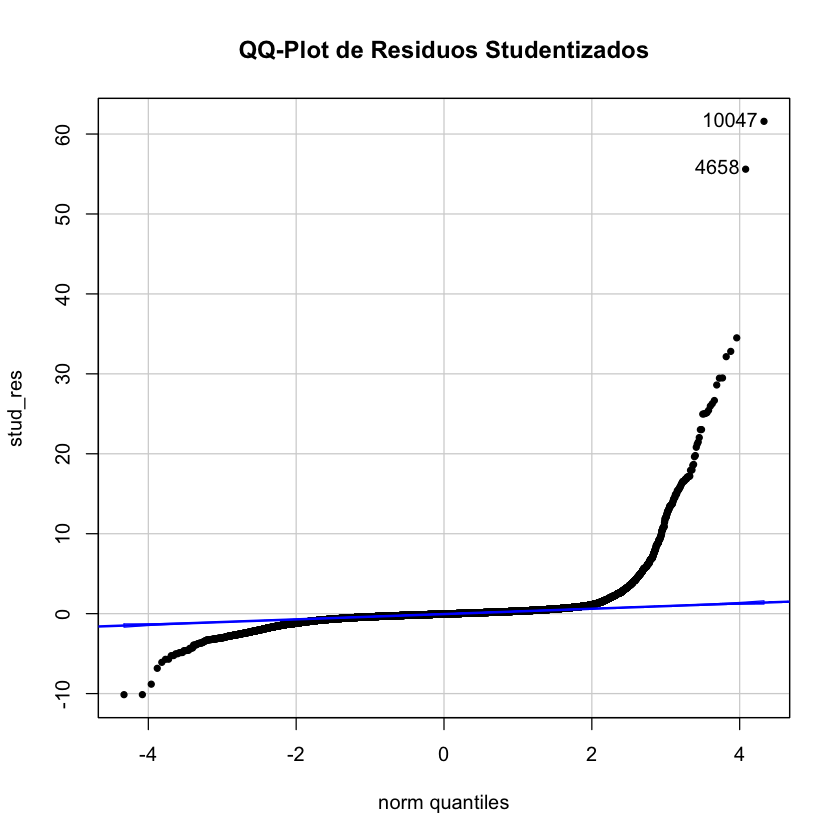

In [136]:

# Q-Q plot con car::qqPlot
qqPlot(stud_res, pch = 20, 
       main = "QQ-Plot de Residuos Studentizados")

In [141]:

library(tseries)
# Prueba de normalidad de Jarque-Bera
jarque.bera.test(stud_res)


	Jarque Bera Test

data:  stud_res
X-squared = 919155496, df = 2, p-value < 2.2e-16


El resultado del test de Jarque–Bera (con un valor de la estadística \chi^2 sumamente elevado y un p-value < 2.2e-16) indica que, con toda probabilidad, los residuos no siguen una distribución normal.

  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100%


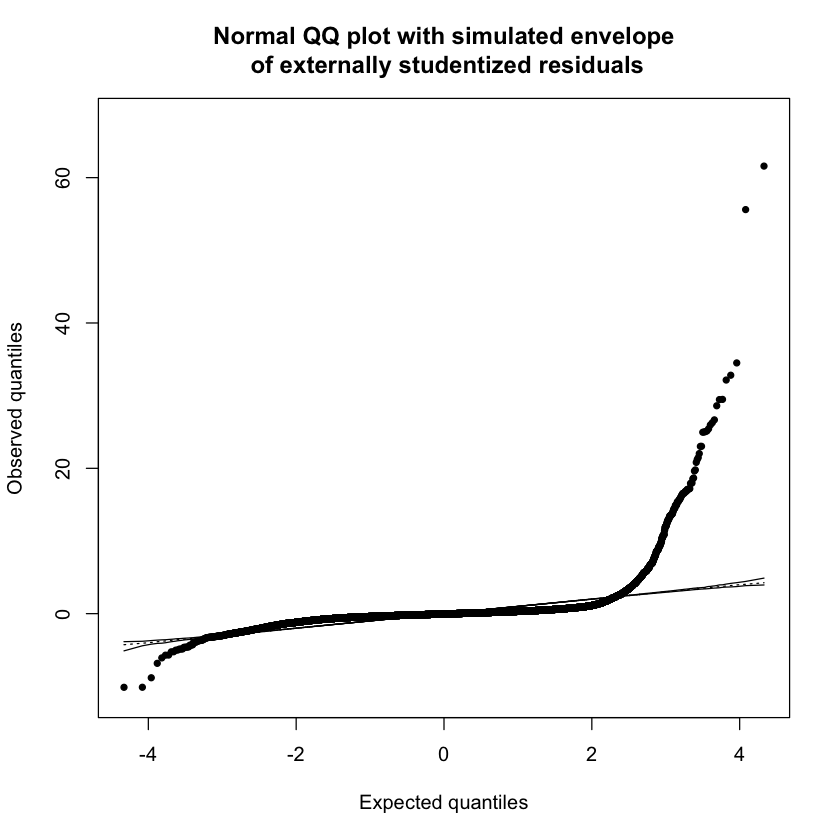

In [145]:
library(glmtoolbox) #envelope simulado
envelope(modelo)

	•	Hay colas más pesadas o outliers severos en la parte superior de los residuos, lo que sugiere que el modelo lineal no capta bien esas observaciones.
    
	•	Esto se alinea con los resultados de otras pruebas de normalidad (Jarque–Bera, Shapiro–Wilk, etc.) y con la presencia de valores muy altos de los residuos.


#### Conclusión Iteración 2.
Seleccionar variables para eliminar mediante regresión LASSO.
Aplicar mínimos cuadrados generalizados factibles.

---

# Tercera Iteración

# Estimación Iteración 3

### Implementación de regresión LASSO

In [235]:
# Ejemplo de fórmula: ajusta total_trips_log en función de varias
# (incluyendo factores, numéricas, etc.)
formula_ridge_lasso <- total_trips ~ max_nivel_edu + app_antes_vj + otro_vj + 
  orden_vj + estra_hg + etapas + weights + mean_duracion + mean_edad_prom + 
  mean_mujeres + mean_modo_a_pie + mean_modo_priv + mean_modo_bici + 
  mean_modo_pub + mean_modo_tax + mean_modo_otro + mean_freq_todos_dias + 
  mean_freq_varios_dias + mean_madre_cab_familia

In [245]:
# A partir de flow_df
# model.matrix() creará dummies para factores y dejará numéricas tal cual
mat <- model.matrix(formula_ridge_lasso, data = flow_df2)

# OJO: model.matrix() incluye la columna de intercepto en la primera columna, 
# a veces se retira con [,-1]
x <- mat[, -1]   # si deseas eliminar la columna de 1’s para el intercepto

# La respuesta
y <- flow_df2$total_trips

In [246]:
library(glmnet)

In [247]:
set.seed(1)
train_idx <- sample(nrow(flow_df2), size = floor(0.7 * nrow(flow_df2)))
x_train <- x[train_idx, ]
y_train <- y[train_idx]
x_test  <- x[-train_idx, ]
y_test  <- y[-train_idx]


[1] 0.0005988002

[1] 3.502165

37 x 1 sparse Matrix of class "dgCMatrix"
                                                       s0
(Intercept)                                  2.2316122818
max_nivel_eduMedia incompleta (10° y 11°)   -0.2583363819
max_nivel_eduNinguno                        -0.3907934002
max_nivel_eduPosgrado completo              -0.1051302156
max_nivel_eduPosgrado incompleto            -0.2938876199
max_nivel_eduPreescolar                     -0.5189034792
max_nivel_eduPrimaria completa              -0.1020517759
max_nivel_eduPrimaria incompleta             0.0524693983
max_nivel_eduSecundaria completa            -0.1753659768
max_nivel_eduSecundaria incompleta          -0.0836978378
max_nivel_eduTécnico/Tecnológico completa   -0.2119974081
max_nivel_eduTécnico/Tecnológico incompleta -0.3474217503
max_nivel_eduUniversitario completo         -0.0501471056
max_nivel_eduUniversitario incompleto       -0.1769645643
app_antes_vjSí                              -0.1840600838
otro_vjSí                     

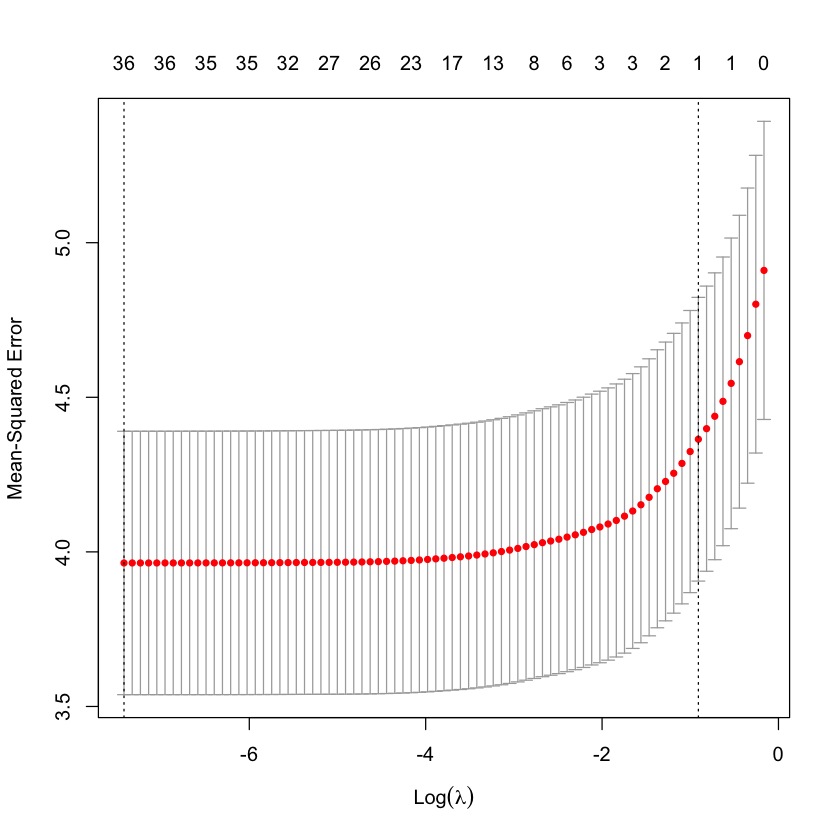

In [248]:

# Grid de valores de lambda (puedes ajustarlo a tus necesidades)
grid <- 10^seq(4, -2, length = 100)  # por ejemplo, de 10^4 hasta 10^-2

lasso.mod <- glmnet(x_train, y_train, alpha = 1, lambda = grid)


# Validación cruzada
cv.lasso <- cv.glmnet(x_train, y_train, alpha = 1)
plot(cv.lasso)
bestlam_lasso <- cv.lasso$lambda.min
bestlam_lasso

# Error de predicción
lasso.best <- glmnet(x_train, y_train, alpha = 1, lambda = bestlam_lasso)
pred.lasso <- predict(lasso.best, newx = x_test)
mean((pred.lasso - y_test)^2)

# Coeficientes
lasso.full <- glmnet(x, y, alpha = 1, lambda = bestlam_lasso)
coef(lasso.full)

#### Eliminamos las variables con |B|<0.001, para este caso la única que aplica es (mean_edad_prom)

In [251]:
library(ggplot2)

# Lista de variables independientes (predictoras) en el modelo
vars <- c(
  'total_trips', "max_nivel_edu", "app_antes_vj", "otro_vj", "orden_vj", 
  "estra_hg", "etapas", "zat_hg", "utam_ori", "utam_des", "weights",
  "mean_duracion", "mean_mujeres", "mean_modo_a_pie",
  "mean_modo_priv", "mean_modo_bici", "mean_modo_pub", "mean_modo_tax",
  "mean_modo_otro", "mean_otro_viaje", "mean_freq_todos_dias",
  "mean_freq_varios_dias", "mean_freq_otro", "mean_madre_cab_familia"
)
flow_df3 = flow_df[vars]

In [253]:
modelo3 <- lm(
  log(total_trips) ~ max_nivel_edu + app_antes_vj + otro_vj + orden_vj + estra_hg + etapas + zat_hg + utam_ori + utam_des + 
    + (weights) + log(mean_duracion) + mean_mujeres + mean_modo_a_pie + mean_modo_priv +
    mean_modo_bici + mean_modo_pub + mean_modo_tax + mean_modo_otro + mean_freq_todos_dias +
    mean_freq_varios_dias + mean_madre_cab_familia,
  data = flow_df3
)

summary(modelo3)


Call:
lm(formula = log(total_trips) ~ max_nivel_edu + app_antes_vj + 
    otro_vj + orden_vj + estra_hg + etapas + zat_hg + utam_ori + 
    utam_des + +(weights) + log(mean_duracion) + mean_mujeres + 
    mean_modo_a_pie + mean_modo_priv + mean_modo_bici + mean_modo_pub + 
    mean_modo_tax + mean_modo_otro + mean_freq_todos_dias + mean_freq_varios_dias + 
    mean_madre_cab_familia, data = flow_df3)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5830 -0.1837 -0.0294  0.1438  2.2736 

Coefficients:
                                              Estimate Std. Error  t value
(Intercept)                                  1.048e+00  2.163e-02   48.447
max_nivel_eduMedia incompleta (10° y 11°)   -6.512e-02  7.087e-03   -9.188
max_nivel_eduNinguno                        -1.188e-01  1.076e-02  -11.048
max_nivel_eduPosgrado completo              -6.873e-02  6.425e-03  -10.697
max_nivel_eduPosgrado incompleto            -1.537e-01  1.768e-02   -8.693
max_nivel_eduPreescolar             

#### Después de haber eliminado la variable (mean_edad_prom) y haber hecho OLS, el resultado es casi el mismo que el obtenido en la iteración 2

### Implementación de regresión por mínimos cuadrados generalizados factibles

In [258]:
# 1) Ajuste OLS inicial
modelo_ols <- lm(log(total_trips) ~ max_nivel_edu + app_antes_vj + otro_vj + orden_vj + estra_hg + etapas 
                 + zat_hg + utam_ori + utam_des + (weights) + log(mean_duracion) + mean_mujeres + mean_modo_a_pie 
                 + mean_modo_priv + mean_modo_bici + mean_modo_pub + mean_modo_tax + mean_modo_otro + mean_freq_todos_dias 
                 + mean_freq_varios_dias + mean_madre_cab_familia,
                 data = flow_df2)

summary(modelo_ols)  # Observas los coeficientes, R^2, etc.

# Guardamos residuales
u_hat <- modelo_ols$residuals


Call:
lm(formula = log(total_trips) ~ max_nivel_edu + app_antes_vj + 
    otro_vj + orden_vj + estra_hg + etapas + zat_hg + utam_ori + 
    utam_des + (weights) + log(mean_duracion) + mean_mujeres + 
    mean_modo_a_pie + mean_modo_priv + mean_modo_bici + mean_modo_pub + 
    mean_modo_tax + mean_modo_otro + mean_freq_todos_dias + mean_freq_varios_dias + 
    mean_madre_cab_familia, data = flow_df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5830 -0.1837 -0.0294  0.1438  2.2736 

Coefficients:
                                              Estimate Std. Error  t value
(Intercept)                                  1.048e+00  2.163e-02   48.447
max_nivel_eduMedia incompleta (10° y 11°)   -6.512e-02  7.087e-03   -9.188
max_nivel_eduNinguno                        -1.188e-01  1.076e-02  -11.048
max_nivel_eduPosgrado completo              -6.873e-02  6.425e-03  -10.697
max_nivel_eduPosgrado incompleto            -1.537e-01  1.768e-02   -8.693
max_nivel_eduPreescolar              

In [260]:
# 2) Modelo de la varianza (en log)
modvar <- lm(log(u_hat^2) ~ max_nivel_edu + app_antes_vj + otro_vj + 
               orden_vj + estra_hg + etapas + weights + mean_duracion + 
               mean_edad_prom + mean_mujeres + mean_modo_a_pie + mean_modo_priv + 
               mean_modo_bici + mean_modo_pub + mean_modo_tax + mean_modo_otro + 
               mean_freq_todos_dias + mean_freq_varios_dias + mean_madre_cab_familia,
             data = flow_df)

summary(modvar)


Call:
lm(formula = log(u_hat^2) ~ max_nivel_edu + app_antes_vj + otro_vj + 
    orden_vj + estra_hg + etapas + weights + mean_duracion + 
    mean_edad_prom + mean_mujeres + mean_modo_a_pie + mean_modo_priv + 
    mean_modo_bici + mean_modo_pub + mean_modo_tax + mean_modo_otro + 
    mean_freq_todos_dias + mean_freq_varios_dias + mean_madre_cab_familia, 
    data = flow_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-62.553  -0.986   0.390   1.404   9.431 

Coefficients:
                                              Estimate Std. Error t value
(Intercept)                                 -2.156e+00  7.418e-02 -29.066
max_nivel_eduMedia incompleta (10° y 11°)   -1.870e-01  5.162e-02  -3.624
max_nivel_eduNinguno                        -5.268e-01  7.820e-02  -6.737
max_nivel_eduPosgrado completo              -2.510e-01  4.635e-02  -5.416
max_nivel_eduPosgrado incompleto            -6.243e-01  1.282e-01  -4.871
max_nivel_eduPreescolar                     -4.260e-01  7.972e-02  -5

In [261]:
# 3) Ajuste FGLS con pesos = 1 / exp(modvar$fitted.values)
fgls <- lm(
  formula = total_trips ~ max_nivel_edu + app_antes_vj + otro_vj + 
              orden_vj + estra_hg + etapas + weights + mean_duracion + 
              mean_edad_prom + mean_mujeres + mean_modo_a_pie + mean_modo_priv + 
              mean_modo_bici + mean_modo_pub + mean_modo_tax + mean_modo_otro + 
              mean_freq_todos_dias + mean_freq_varios_dias + mean_madre_cab_familia,
  data    = flow_df,
  weights = 1 / exp(modvar$fitted.values)
)

summary(fgls)


Call:
lm(formula = total_trips ~ max_nivel_edu + app_antes_vj + otro_vj + 
    orden_vj + estra_hg + etapas + weights + mean_duracion + 
    mean_edad_prom + mean_mujeres + mean_modo_a_pie + mean_modo_priv + 
    mean_modo_bici + mean_modo_pub + mean_modo_tax + mean_modo_otro + 
    mean_freq_todos_dias + mean_freq_varios_dias + mean_madre_cab_familia, 
    data = flow_df, weights = 1/exp(modvar$fitted.values))

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-23.981  -2.489  -1.181   0.619 264.873 

Coefficients:
                                              Estimate Std. Error t value
(Intercept)                                  1.896e+00  3.139e-02  60.400
max_nivel_eduMedia incompleta (10° y 11°)   -9.725e-02  2.162e-02  -4.498
max_nivel_eduNinguno                        -1.559e-01  2.768e-02  -5.630
max_nivel_eduPosgrado completo              -3.660e-02  1.802e-02  -2.030
max_nivel_eduPosgrado incompleto            -1.517e-01  4.182e-02  -3.627
max_nivel_eduPreescola

#### Después de haber implementado FGLS, el resultado es muy inferior al modelo implementado en la iteración 2

# Conclusiones
- El modelo que obtuvo mejores resultados fue el obtenido en la segunda iteración mediante mínimos cuadrados ordinarios. 
- Los modelos de regresión lineal pueden capturar relaciones básicas entre variables sociodemográficas y la distribución de viajes, pero su capacidad de ajuste no es muy alta.
- Factores como el estrato socioeconómico, la proporción de viajes en distintos modos y el transbordo de viajes muestran efectos significativos y coherentes con la lógica de la movilidad.
- Una transformación logarítmica y la exclusión de variables colineales mejoraron la especificación del modelo, según lo evidenciado por las pruebas de validación.
- El método FGLS no ofreció ventajas claras frente al modelo OLS ajustado con variables transformadas.
- Para futuras aplicaciones, se recomienda combinar estos enfoques con métodos más flexibles que capturen relaciones no lineales.
- Incluir variables adicionales, como la densidad poblacional o la ubicación de empresas y eventos, puede aumentar la capacidad explicativa de los modelos de distribución de viajes.